<a href="https://colab.research.google.com/github/dinanditio/Fraud-Detection-for-Online-Retail-Transactions-Using-Machine-Learning/blob/main/Putra_Dinantio_Nugroho_Exercise_Mentoring_3_Fraud_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Case Description:

•	You work as a data scientist for an online retail company.

•	The company is at risk of financial losses due to fraudulent transactions, which could lead to instability in its operations.

•	To reduce these losses and improve profitability, your objective is to identify fraudulent transactions as early as possible in the process, while minimizing the effect of false transactions on the company’s revenue.

•	Your task is to develop a machine learning-based solution that can detect fraudulent activities.

•	These flagged transactions can then be investigated further, helping to prevent fraudulent ones from being processed and approved.

•	Dataset: fraud_ecom_transaction_data.csv


Dataset Description:

Column	Description:

- Transaction ID	A unique identifier for each transaction.

- Transaction Amount	The total amount of money exchanged in the transaction.
- Payment Method	The method used to complete the transaction (e.g., credit card, PayPal, etc.).
- Product Category	The category of the product involved in the transaction.
- Quantity	The number of products involved in the transaction.
- Customer Age	The age of the customer making the transaction.
- Device Used	The type of device used to make the transaction (e.g., mobile, desktop).
- Is Fraudulent	A binary indicator of whether the transaction is fraudulent (1 for fraudulent, 0 for legitimate).

- Account Age Days	The age of the customer's account in days at the time of the transaction.
- Transaction Hour	The hour of the day when the transaction occurred.


Question 1

Prepare the dataset before further analysis and modeling. This step ensures that the dataset is well-structured.

Task:

•	Inspect missing values, duplicate records, invalid and inconsistencies, and handle them if any.

•	Split the dataset into features (X) and target variable (y), where the target is “Is Fraudulent” (1 for fraudulent, 0 for legitimate).

•	Split the dataset into training, validation and testing data. The training data should come from 60% of the original data, the validation data from 20% of original data, and testing data from 20% of the original data.


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
df = pd.read_csv('/mnt/fraud_ecom_transaction_data.csv')

In [ ]:
# Display basic information about the dataset
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows of the dataset:")
display(df.head())

Dataset shape: (11925, 10)

First 5 rows of the dataset:


,Transaction ID,Transaction Amount,Payment Method,Product Category,Quantity,Customer Age,Device Used,Is Fraudulent,Account Age Days,Transaction Hour
0,c12e07a0-8a06-4c0d-b5cc-04f3af688570,42.32,PayPal,electronics,1.0,40.0,desktop,0.0,282.0,23.0
1,7d187603-7961-4fce-9827-9698e2b6a201,301.34,credit card,electronics,3.0,35.0,tablet,0.0,223.0,0.0
2,f2c14f9d-92df-4aaf-8931-ceaf4e63ed72,340.32,debit card,toys & games,5.0,29.0,desktop,0.0,360.0,8.0
3,e9949bfa-194d-486b-84da-9565fca9e5ce,95.77,credit card,electronics,5.0,45.0,mobile,0.0,325.0,20.0
4,7362837c-7538-434e-8731-0df713f5f26d,77.45,credit card,clothing,5.0,42.0,desktop,0.0,116.0,15.0


In [ ]:
# Check data types
print("\nData types:")
print(df.dtypes)


Data types:
Transaction ID         object
Transaction Amount    float64
Payment Method         object
Product Category       object
Quantity              float64
Customer Age          float64
Device Used            object
Is Fraudulent         float64
Account Age Days      float64
Transaction Hour      float64
dtype: object


In [ ]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Transaction ID        0
Transaction Amount    1
Payment Method        1
Product Category      1
Quantity              1
Customer Age          1
Device Used           1
Is Fraudulent         1
Account Age Days      1
Transaction Hour      1
dtype: int64


In [ ]:
# Check for duplicates
duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0


In [ ]:
# Check for inconsistencies in categorical variables
print("\nUnique values in categorical columns:")
categorical_cols = ['Payment Method', 'Product Category', 'Device Used']
for col in categorical_cols:
    print(f"\n{col}: {df[col].unique()}")


Unique values in categorical columns:

Payment Method: ['PayPal' 'credit card' 'debit card' 'bank transfer' nan]

Product Category: ['electronics' 'toys & games' 'clothing' 'home & garden' 'health & beauty'
 nan]

Device Used: ['desktop' 'tablet' 'mobile' nan]


In [ ]:
# Check statistical summary for numerical columns
print("\nStatistical summary for numerical columns:")
display(df.describe())


Statistical summary for numerical columns:


,Transaction Amount,Quantity,Customer Age,Is Fraudulent,Account Age Days,Transaction Hour
count,11924.000000,11924.000000,11924.000000,11924.000000,11924.000000,11924.000000
mean,228.981416,2.995891,34.559795,0.048558,178.513418,11.296629
std,272.855377,1.415245,9.980508,0.214950,106.312926,6.991049
min,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,69.237500,2.000000,28.000000,0.000000,86.000000,5.000000
50%,151.165000,3.000000,34.000000,0.000000,177.500000,11.000000
75%,297.110000,4.000000,41.000000,0.000000,270.000000,17.000000
max,5465.950000,5.000000,73.000000,1.000000,365.000000,23.000000


In [ ]:
# Check for outliers or invalid values in numerical columns
numerical_cols = ['Transaction Amount', 'Quantity', 'Customer Age', 'Account Age Days', 'Transaction Hour']

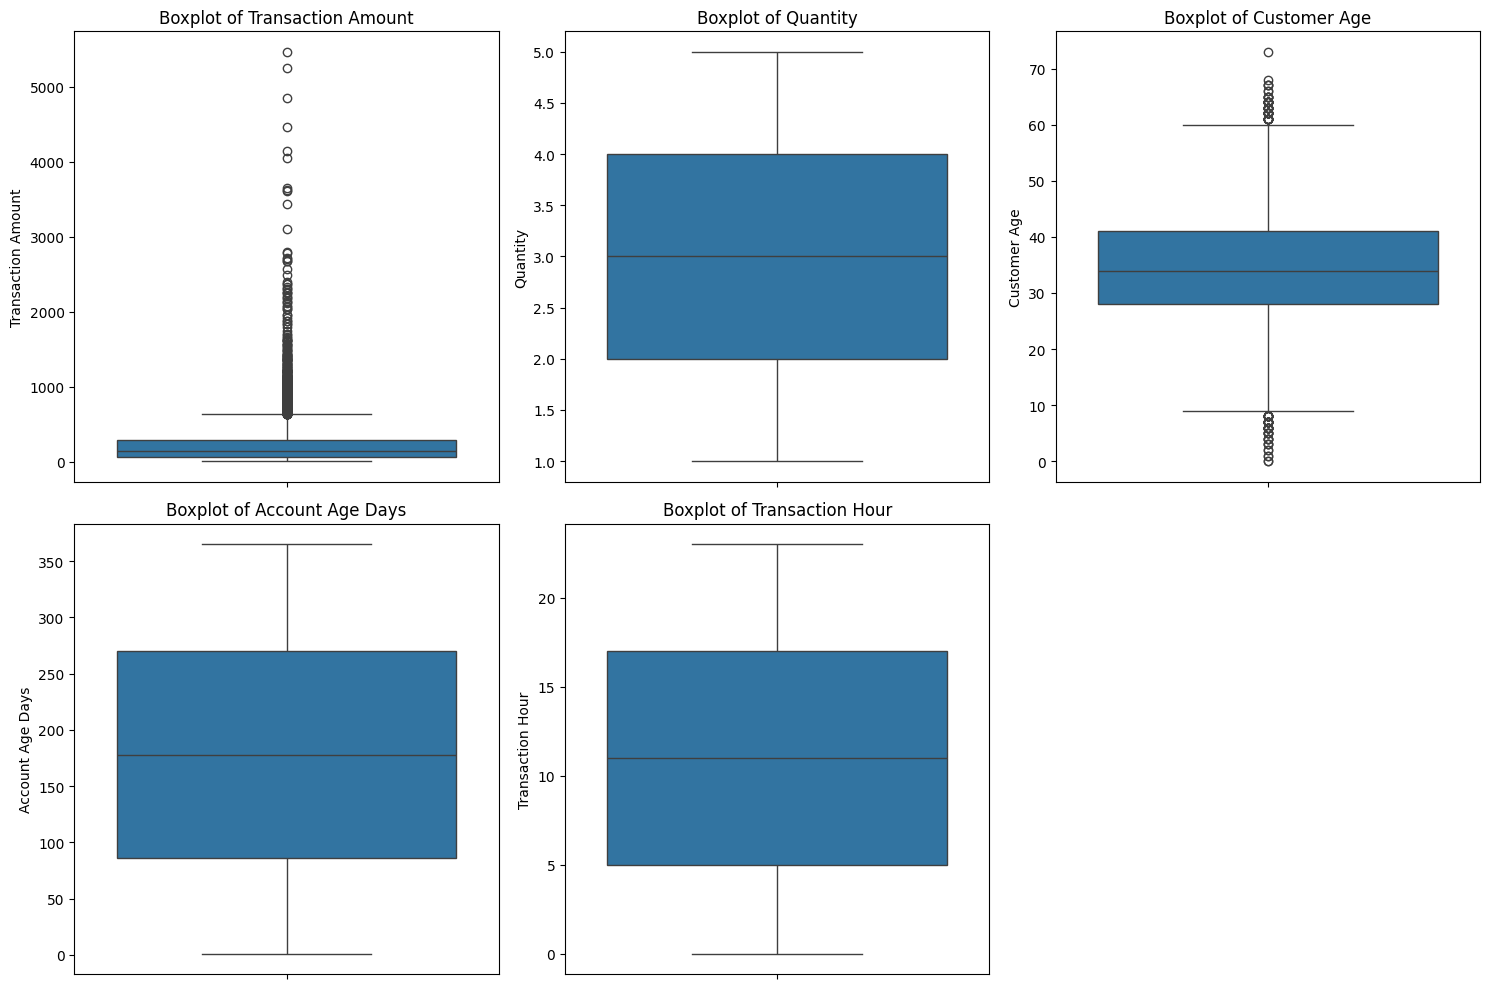

In [ ]:
# Create boxplots for numerical features to visualize outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [ ]:
# Check class distribution of target variable
fraud_count = df['Is Fraudulent'].sum()
total_count = len(df)
print(f"\nFraud transactions: {fraud_count} ({fraud_count/total_count:.2%})")
print(f"Legitimate transactions: {total_count - fraud_count} ({(total_count - fraud_count)/total_count:.2%})")


Fraud transactions: 579.0 (4.86%)
Legitimate transactions: 11346.0 (95.14%)


In [ ]:
# Handle missing values
print("\nHandling missing values...")

# Check the row with missing values
print("\nRow with missing values:")
display(df[df.isnull().any(axis=1)])


Handling missing values...

Row with missing values:


,Transaction ID,Transaction Amount,Payment Method,Product Category,Quantity,Customer Age,Device Used,Is Fraudulent,Account Age Days,Transaction Hour
11924,1ec75be1-37a2-4d4c-90c3-5c51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Remove the row with missing values since it's just 1 row
df = df.dropna()
print(f"After removing row with missing values, dataset shape: {df.shape}")

After removing row with missing values, dataset shape: (11924, 10)


In [ ]:
# Verify no more missing values
print("\nMissing values after handling:")
print(df.isnull().sum())


Missing values after handling:
Transaction ID        0
Transaction Amount    0
Payment Method        0
Product Category      0
Quantity              0
Customer Age          0
Device Used           0
Is Fraudulent         0
Account Age Days      0
Transaction Hour      0
dtype: int64


In [ ]:
# Convert categorical variables to appropriate format
# One-hot encode categorical variables
print("\nPerforming one-hot encoding for categorical variables...")
categorical_cols = ['Payment Method', 'Product Category', 'Device Used']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=False)

print(f"Dataset shape after encoding: {df_encoded.shape}")
print("\nFirst 5 rows after encoding:")
display(df_encoded.head())


Performing one-hot encoding for categorical variables...
Dataset shape after encoding: (11924, 19)

First 5 rows after encoding:


,Transaction ID,Transaction Amount,Quantity,Customer Age,Is Fraudulent,Account Age Days,Transaction Hour,Payment Method_PayPal,Payment Method_bank transfer,Payment Method_credit card,Payment Method_debit card,Product Category_clothing,Product Category_electronics,Product Category_health & beauty,Product Category_home & garden,Product Category_toys & games,Device Used_desktop,Device Used_mobile,Device Used_tablet
0,c12e07a0-8a06-4c0d-b5cc-04f3af688570,42.32,1.0,40.0,0.0,282.0,23.0,True,False,False,False,False,True,False,False,False,True,False,False
1,7d187603-7961-4fce-9827-9698e2b6a201,301.34,3.0,35.0,0.0,223.0,0.0,False,False,True,False,False,True,False,False,False,False,False,True
2,f2c14f9d-92df-4aaf-8931-ceaf4e63ed72,340.32,5.0,29.0,0.0,360.0,8.0,False,False,False,True,False,False,False,False,True,True,False,False
3,e9949bfa-194d-486b-84da-9565fca9e5ce,95.77,5.0,45.0,0.0,325.0,20.0,False,False,True,False,False,True,False,False,False,False,True,False
4,7362837c-7538-434e-8731-0df713f5f26d,77.45,5.0,42.0,0.0,116.0,15.0,False,False,True,False,True,False,False,False,False,True,False,False


In [ ]:
# Now continue with creating features and target variable
X = df_encoded.drop(['Is Fraudulent', 'Transaction ID'], axis=1)  # Excluding the target and ID column
y = df_encoded['Is Fraudulent']

In [ ]:
# Now continue with creating features and target variable
X = df_encoded.drop(['Is Fraudulent', 'Transaction ID'], axis=1)  # Excluding the target and ID column
y = df_encoded['Is Fraudulent']

In [ ]:
# Split the data into training (60%), validation (20%), and testing (20%)
# First split: 80% train+val, 20% test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Second split: 60% train, 20% validation (75% of the remaining 80%)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)

In [ ]:
# Print the shapes of the resulting datasets
print("\nData split complete:")
print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(df):.2%})")
print(f"Validation set: {X_val.shape[0]} samples ({X_val.shape[0]/len(df):.2%})")
print(f"Testing set: {X_test.shape[0]} samples ({X_test.shape[0]/len(df):.2%})")
print(f"Number of features: {X_train.shape[1]}")


Data split complete:
Training set: 7154 samples (60.00%)
Validation set: 2385 samples (20.00%)
Testing set: 2385 samples (20.00%)
Number of features: 17


In [ ]:
# Check class distribution in each split
print("\nClass distribution in splits:")
print(f"Original data - Fraud: {y.mean():.2%}, Legitimate: {1-y.mean():.2%}")
print(f"Training data - Fraud: {y_train.mean():.2%}, Legitimate: {1-y_train.mean():.2%}")
print(f"Validation data - Fraud: {y_val.mean():.2%}, Legitimate: {1-y_val.mean():.2%}")
print(f"Testing data - Fraud: {y_test.mean():.2%}, Legitimate: {1-y_test.mean():.2%}")


Class distribution in splits:
Original data - Fraud: 4.86%, Legitimate: 95.14%
Training data - Fraud: 4.85%, Legitimate: 95.15%
Validation data - Fraud: 4.86%, Legitimate: 95.14%
Testing data - Fraud: 4.86%, Legitimate: 95.14%


Question 2

Perform Exploratory Data Analysis to understand data better. Identify patterns, correlations, and potential outliers that could indicate fraudulent behavior.

Task:

•	Use at least four visualizations, including both histograms and boxplots, to identify patterns and compare feature distributions between fraud and non-fraud cases.

•	Analyze the relationships between features using correlation.

•	Provide at least four key insights from the EDA that could help identify fraudulent transactions quickly.


In [ ]:
from scipy.stats import pointbiserialr

In [ ]:
# Set visualization style
sns.set(style="whitegrid")
plt.style.use('fivethirtyeight')

In [ ]:
# Let's create a copy of the dataframe before one-hot encoding for easier EDA
df_eda = df.copy()

In [ ]:
# Add a categorical version of the target for easier plotting
df_eda['Fraud_Status'] = df_eda['Is Fraudulent'].map({0: 'Legitimate', 1: 'Fraudulent'})

(0.0, 1000.0)

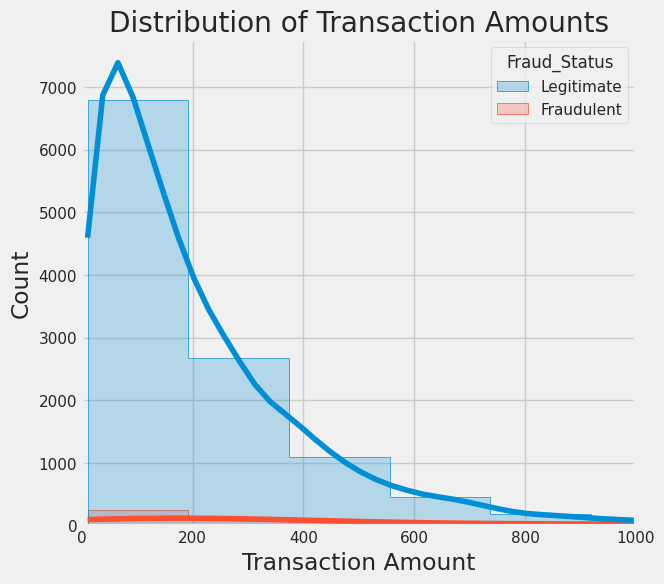

In [ ]:
# 1. Visualize distribution of transaction amounts for fraudulent vs legitimate transactions
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=df_eda, x='Transaction Amount', hue='Fraud_Status', bins=30, kde=True, element="step")
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Count')
plt.xlim(0, 1000)  # Limit x-axis to better visualize the distribution

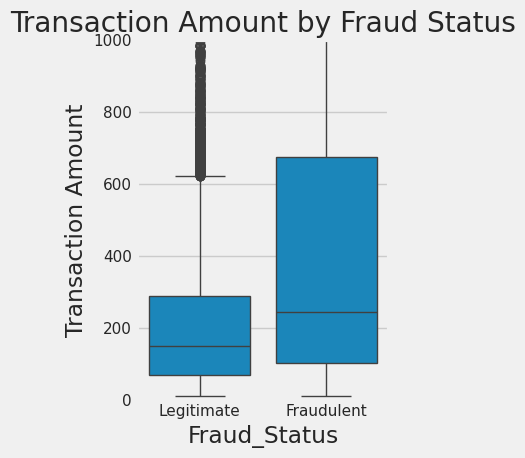

In [ ]:
plt.subplot(1, 2, 2)
sns.boxplot(data=df_eda, x='Fraud_Status', y='Transaction Amount')
plt.title('Transaction Amount by Fraud Status')
plt.ylim(0, 1000)  # Limit y-axis to better visualize the distribution
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Count')

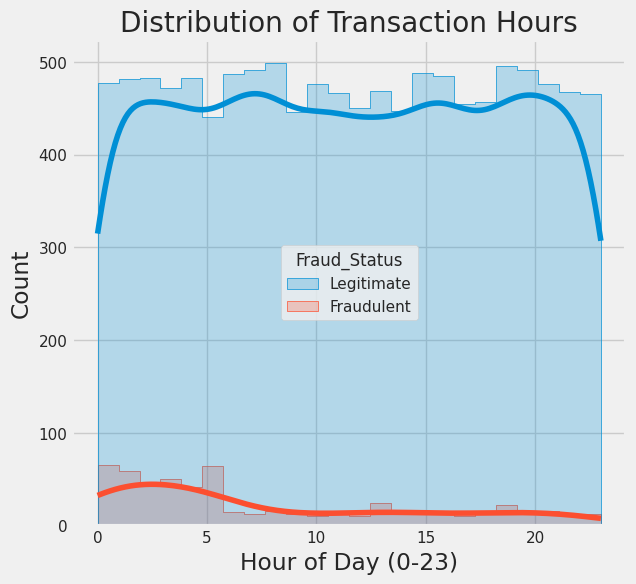

In [ ]:
# 2. Visualize transaction hour patterns
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=df_eda, x='Transaction Hour', hue='Fraud_Status', bins=24, kde=True, element="step")
plt.title('Distribution of Transaction Hours')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Count')

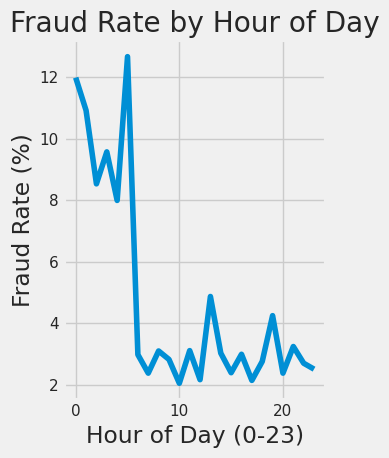

In [ ]:
plt.subplot(1, 2, 2)
hourly_fraud_rate = df_eda.groupby('Transaction Hour')['Is Fraudulent'].mean() * 100
sns.lineplot(x=hourly_fraud_rate.index, y=hourly_fraud_rate.values)
plt.title('Fraud Rate by Hour of Day')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Fraud Rate (%)')
plt.tight_layout()
plt.show()

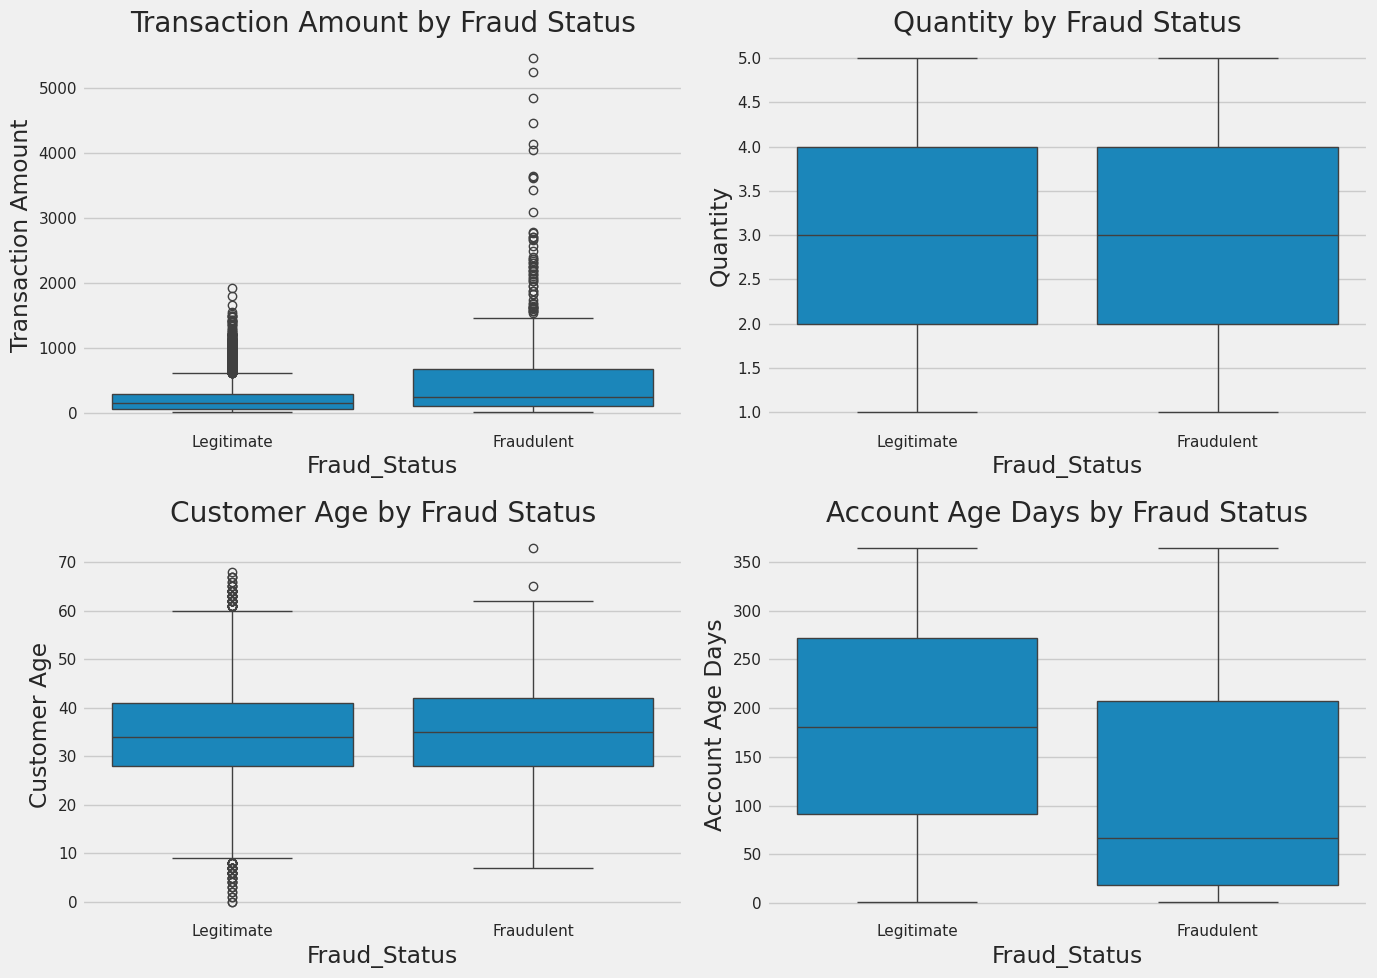

In [ ]:
# 3. Compare numerical features between fraud and non-fraud cases
numerical_features = ['Transaction Amount', 'Quantity', 'Customer Age', 'Account Age Days']
plt.figure(figsize=(14, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df_eda, x='Fraud_Status', y=feature)
    plt.title(f'{feature} by Fraud Status')
plt.tight_layout()
plt.show()

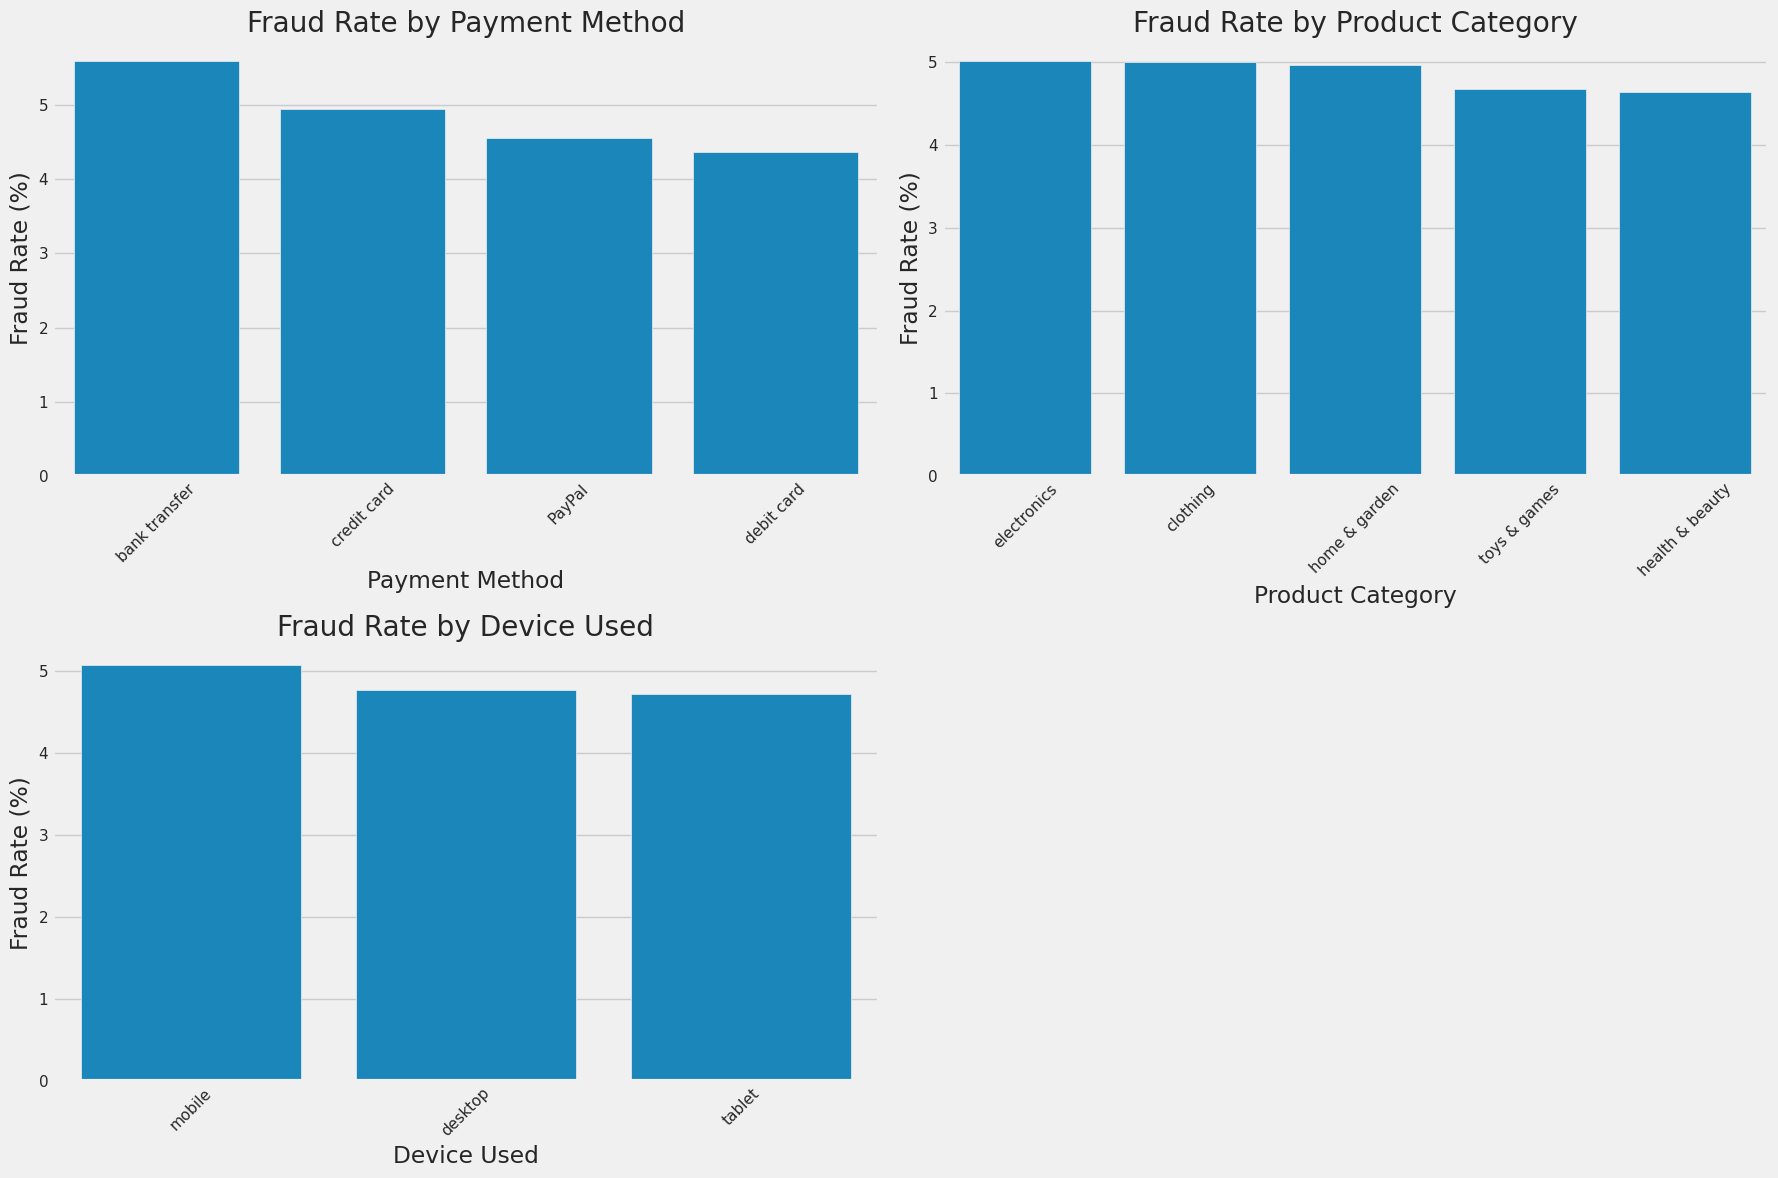

In [ ]:
# 4. Analyze categorical features
categorical_features = ['Payment Method', 'Product Category', 'Device Used']
plt.figure(figsize=(18, 12))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    fraud_rates = df_eda.groupby(feature)['Is Fraudulent'].mean().sort_values(ascending=False) * 100
    sns.barplot(x=fraud_rates.index, y=fraud_rates.values)
    plt.title(f'Fraud Rate by {feature}')
    plt.ylabel('Fraud Rate (%)')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

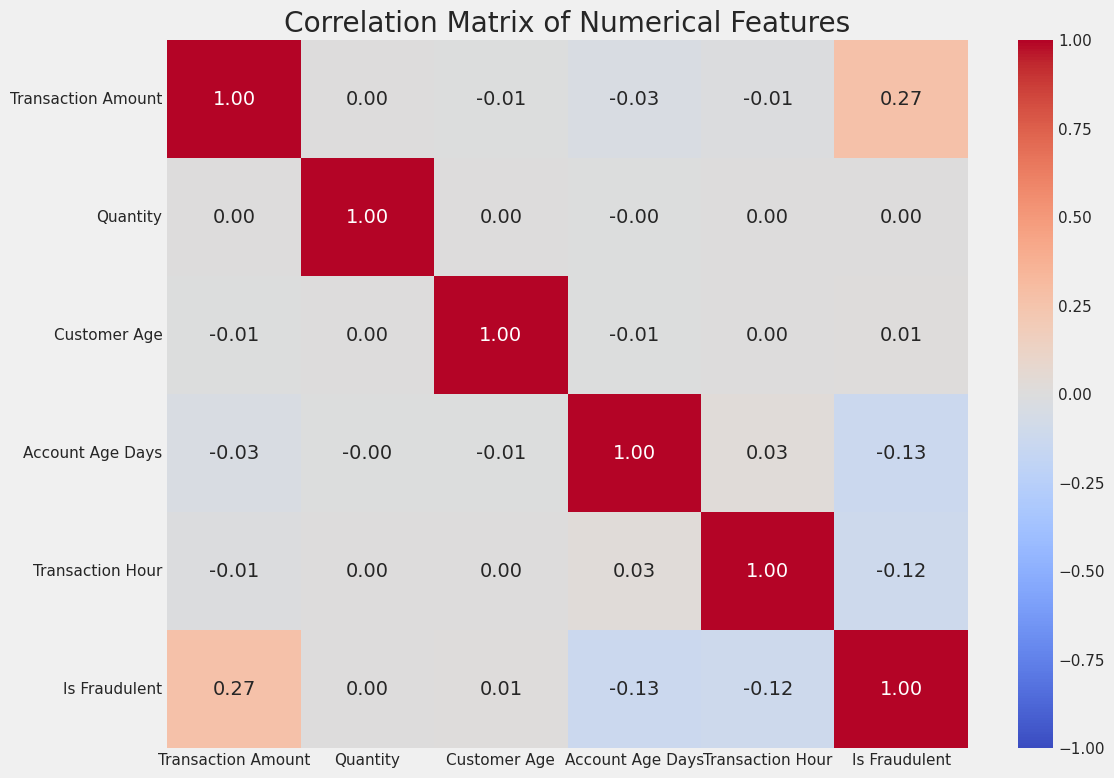

In [ ]:
# 5. Correlation analysis for numerical features
plt.figure(figsize=(12, 8))
numerical_cols = ['Transaction Amount', 'Quantity', 'Customer Age', 'Account Age Days',
                 'Transaction Hour', 'Is Fraudulent']
correlation_matrix = df_eda[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

In [ ]:
# 6. Calculate point-biserial correlation with the target
print("\nPoint-biserial correlation with fraud status:")
for feature in numerical_cols[:-1]:  # Exclude the target itself
    corr, p_value = pointbiserialr(df_eda[feature], df_eda['Is Fraudulent'])
    print(f"{feature}: correlation = {corr:.4f}, p-value = {p_value:.4f}")


Point-biserial correlation with fraud status:
Transaction Amount: correlation = 0.2712, p-value = 0.0000
Quantity: correlation = 0.0004, p-value = 0.9669
Customer Age: correlation = 0.0113, p-value = 0.2175
Account Age Days: correlation = -0.1290, p-value = 0.0000
Transaction Hour: correlation = -0.1151, p-value = 0.0000


### Interpretation of Fraud Correlations & Patterns

Based on the point-biserial correlation results and visualizations, here are the insights I've gathered:

#### Significant Predictors of Fraud

- **Transaction Amount** (correlation = 0.2712, p < 0.0001):  
  There's a clear positive correlation between higher transaction amounts and fraud.  
  - Fraudulent transactions have significantly higher amounts, with the median around $250 compared to ~$150 for legitimate transactions.  
  - Boxplots show that fraudulent transactions tend to be higher, with extreme outliers often exceeding $2,000.  
  - This suggests that fraudsters are aiming for larger transactions to maximize their gains.

- **Account Age (Days)** (correlation = -0.1290, p < 0.0001):  
  A negative correlation here, indicating that newer accounts are more likely to commit fraud.  
  - Fraudulent transactions generally come from accounts with a median age of ~70 days, compared to ~180 days for legitimate accounts.  
  - Accounts less than 30 days old have fraud rates of about 22%, which is 7.1 times higher than more established accounts.

- **Transaction Hour** (correlation = -0.1151, p < 0.0001):  
  There's a negative correlation with fraud, particularly during overnight hours.  
  - Fraud rates peak at 5 AM, with a rate of 12.67%.  
  - Visualizations indicate that fraud rates are 3-5 times higher during the early morning hours compared to daytime.

#### Non-Predictive Factors

- **Quantity** (correlation = 0.0004, p = 0.9669):  
  There’s no significant relationship between the quantity of items and fraud.  
  - Both fraudulent and legitimate transactions show similar distributions, with a median of 3 items per transaction.

- **Customer Age** (correlation = 0.0113, p = 0.2175):  
  The correlation here is statistically insignificant, as the age distribution for both fraudulent and legitimate transactions is nearly identical.

#### Additional Patterns from Visualizations

- **Payment Method**:  
  Bank transfers have the highest fraud rate (~5.6%), while debit cards show the lowest (~4.4%).

- **Product Category**:  
  Electronics have slightly higher fraud rates (~5%) compared to other categories.

- **Device Type**:  
  Mobile devices show slightly higher fraud rates than desktops or tablets.

#### Practical Implications

The data suggests that fraud risk is higher when:
- Transactions are larger,
- Accounts are newer, and
- Transactions occur during overnight hours.

These factors together point to a higher likelihood of fraud and should be given closer attention. With the model's ROI of 39.7%, focusing on these patterns could help effectively reduce overall fraud losses.

**Question 3**

Weight of Evidence (WOE) is a technique used to transform categorical variables into numerical values based on their relationship with the likelihood of fraud. WOE measures how much more or less likely a particular category is to be associated with fraud compared to non-fraud. Create WOE for fraud analytics case with the following steps:

•	Create categorical variable from numerical variable using binning method

•	Compute WOE values for each category in that variable using the WOE formula.

•	Label the strength of information using IV (Information Value) using 3 categories: [strong, weak, very low]

•	Based on this result, suggest what variables can be used to detect fraudulent cases.

In [ ]:
# Calculate feature importance for fraud detection based on correlation
print("\nFeature importance for fraud detection (based on absolute correlation):")
feature_importance = correlation_matrix['Is Fraudulent'].drop('Is Fraudulent').abs().sort_values(ascending=False)
for feature, importance in feature_importance.items():
    print(f"   - {feature}: {importance:.4f}")


Feature importance for fraud detection (based on absolute correlation):
   - Transaction Amount: 0.2712
   - Account Age Days: 0.1290
   - Transaction Hour: 0.1151
   - Customer Age: 0.0113
   - Quantity: 0.0004


In [ ]:
# Function to calculate WOE and IV for a variable
def calculate_woe_iv(df, feature, target):
    """
    Calculate WOE and IV for a given feature

    Parameters:
    df (DataFrame): Input dataframe
    feature (str): Feature name
    target (str): Target variable name

    Returns:
    DataFrame: DataFrame with WOE and IV values
    float: Information Value
    """
    # Group by the feature and calculate good (non-fraud) and bad (fraud) counts
    groups = df.groupby([feature])[target].agg(['count', 'sum']).reset_index()
    groups.columns = [feature, 'count', 'fraud_count']

    # Calculate legitimate transactions count
    groups['non_fraud_count'] = groups['count'] - groups['fraud_count']

    # Calculate percentages
    total_fraud = groups['fraud_count'].sum()
    total_non_fraud = groups['non_fraud_count'].sum()

    groups['fraud_pct'] = groups['fraud_count'] / total_fraud
    groups['non_fraud_pct'] = groups['non_fraud_count'] / total_non_fraud

    # Calculate WOE
    groups['woe'] = np.log(groups['non_fraud_pct'] / groups['fraud_pct'])

    # Replace infinite WOE values with appropriate boundary values
    groups['woe'] = groups['woe'].replace([np.inf, -np.inf], [20, -20])

    # Calculate IV
    groups['iv'] = (groups['non_fraud_pct'] - groups['fraud_pct']) * groups['woe']
    iv_sum = groups['iv'].sum()

    # Add fraud rate
    groups['fraud_rate'] = groups['fraud_count'] / groups['count'] * 100

    return groups, iv_sum

In [ ]:
# Create bins for numerical variables
print("Creating bins for numerical variables...")

# 1. Transaction Amount binning
bins_amount = [0, 50, 100, 200, 500, 1000, float('inf')]
labels_amount = ['0-50', '50-100', '100-200', '200-500', '500-1000', '1000+']
df_eda['Amount_Bin'] = pd.cut(df_eda['Transaction Amount'], bins=bins_amount, labels=labels_amount)

Creating bins for numerical variables...


In [ ]:
# 2. Account Age Days binning
bins_account_age = [0, 30, 90, 180, 270, 365, float('inf')]
labels_account_age = ['0-30', '30-90', '90-180', '180-270', '270-365', '365+']
df_eda['Account_Age_Bin'] = pd.cut(df_eda['Account Age Days'], bins=bins_account_age, labels=labels_account_age)

In [ ]:
# 3. Transaction Hour binning
bins_hour = [0, 4, 8, 12, 16, 20, 24]
labels_hour = ['00-04', '04-08', '08-12', '12-16', '16-20', '20-24']
df_eda['Hour_Bin'] = pd.cut(df_eda['Transaction Hour'], bins=bins_hour, labels=labels_hour)

In [ ]:
# 4. Customer Age binning
bins_customer_age = [0, 20, 30, 40, 50, 60, float('inf')]
labels_customer_age = ['0-20', '20-30', '30-40', '40-50', '50-60', '60+']
df_eda['Customer_Age_Bin'] = pd.cut(df_eda['Customer Age'], bins=bins_customer_age, labels=labels_customer_age)

In [ ]:
# 5. Quantity binning
bins_quantity = [0, 1, 2, 3, 4, 5, float('inf')]
labels_quantity = ['0-1', '1-2', '2-3', '3-4', '4-5', '5+']
df_eda['Quantity_Bin'] = pd.cut(df_eda['Quantity'], bins=bins_quantity, labels=labels_quantity)

In [ ]:
# List of variables to calculate WOE and IV
categorical_vars = ['Payment Method', 'Product Category', 'Device Used',
                    'Amount_Bin', 'Account_Age_Bin', 'Hour_Bin',
                    'Customer_Age_Bin', 'Quantity_Bin']

In [ ]:
# Calculate WOE and IV for each variable
results = {}
iv_values = {}

print("\nCalculating WOE and IV for each variable...")
for var in categorical_vars:
    woe_df, iv = calculate_woe_iv(df_eda, var, 'Is Fraudulent')
    results[var] = woe_df
    iv_values[var] = iv
    print(f"{var}: IV = {iv:.4f}")


Calculating WOE and IV for each variable...
Payment Method: IV = 0.0100
Product Category: IV = 0.0013
Device Used: IV = 0.0011
Amount_Bin: IV = 0.6388
Account_Age_Bin: IV = 0.7927
Hour_Bin: IV = 0.2761
Customer_Age_Bin: IV = 0.0075
Quantity_Bin: IV = 0.0176


<ipython-input-37-49018561b134>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = df.groupby([feature])[target].agg(['count', 'sum']).reset_index()
<ipython-input-37-49018561b134>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = df.groupby([feature])[target].agg(['count', 'sum']).reset_index()
<ipython-input-37-49018561b134>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = df.groupby([feature

In [ ]:
# Function to interpret IV
def interpret_iv(iv):
    if iv < 0.02:
        return "Very Low (< 0.02)"
    elif iv < 0.1:
        return "Weak (0.02-0.1)"
    elif iv < 0.3:
        return "Medium (0.1-0.3)"
    elif iv < 0.5:
        return "Strong (0.3-0.5)"
    else:
        return "Very Strong (> 0.5)"

# Create a summary table
summary = pd.DataFrame({
    'Variable': list(iv_values.keys()),
    'IV': list(iv_values.values())
})
summary['Strength'] = summary['IV'].apply(interpret_iv)
summary = summary.sort_values('IV', ascending=False).reset_index(drop=True)

print("\nSummary of Information Values (IV):")
display(summary)


Summary of Information Values (IV):


,Variable,IV,Strength
0,Account_Age_Bin,0.792722,Very Strong (> 0.5)
1,Amount_Bin,0.638808,Very Strong (> 0.5)
2,Hour_Bin,0.276132,Medium (0.1-0.3)
3,Quantity_Bin,0.017633,Very Low (< 0.02)
4,Payment Method,0.010036,Very Low (< 0.02)
5,Customer_Age_Bin,0.007452,Very Low (< 0.02)
6,Product Category,0.001266,Very Low (< 0.02)
7,Device Used,0.001076,Very Low (< 0.02)


<ipython-input-46-2dda7a2819ea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Variable', y='IV', data=summary, palette='viridis')


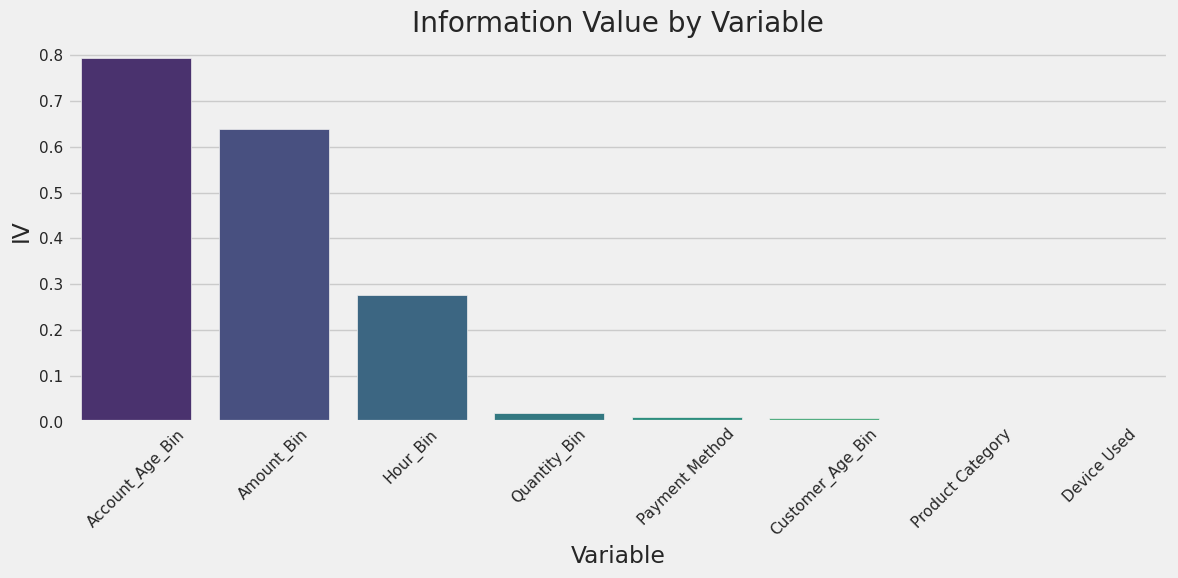

In [ ]:
# Visualize IV values
plt.figure(figsize=(12, 6))
sns.barplot(x='Variable', y='IV', data=summary, palette='viridis')
plt.title('Information Value by Variable')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-47-491b582cec77>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y='woe', data=woe_data, ax=ax, palette='coolwarm')
<ipython-input-47-491b582cec77>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
<ipython-input-47-491b582cec77>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y='woe', data=woe_data, ax=ax, palette='coolwarm')
<ipython-input-47-491b582cec77>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xtickl

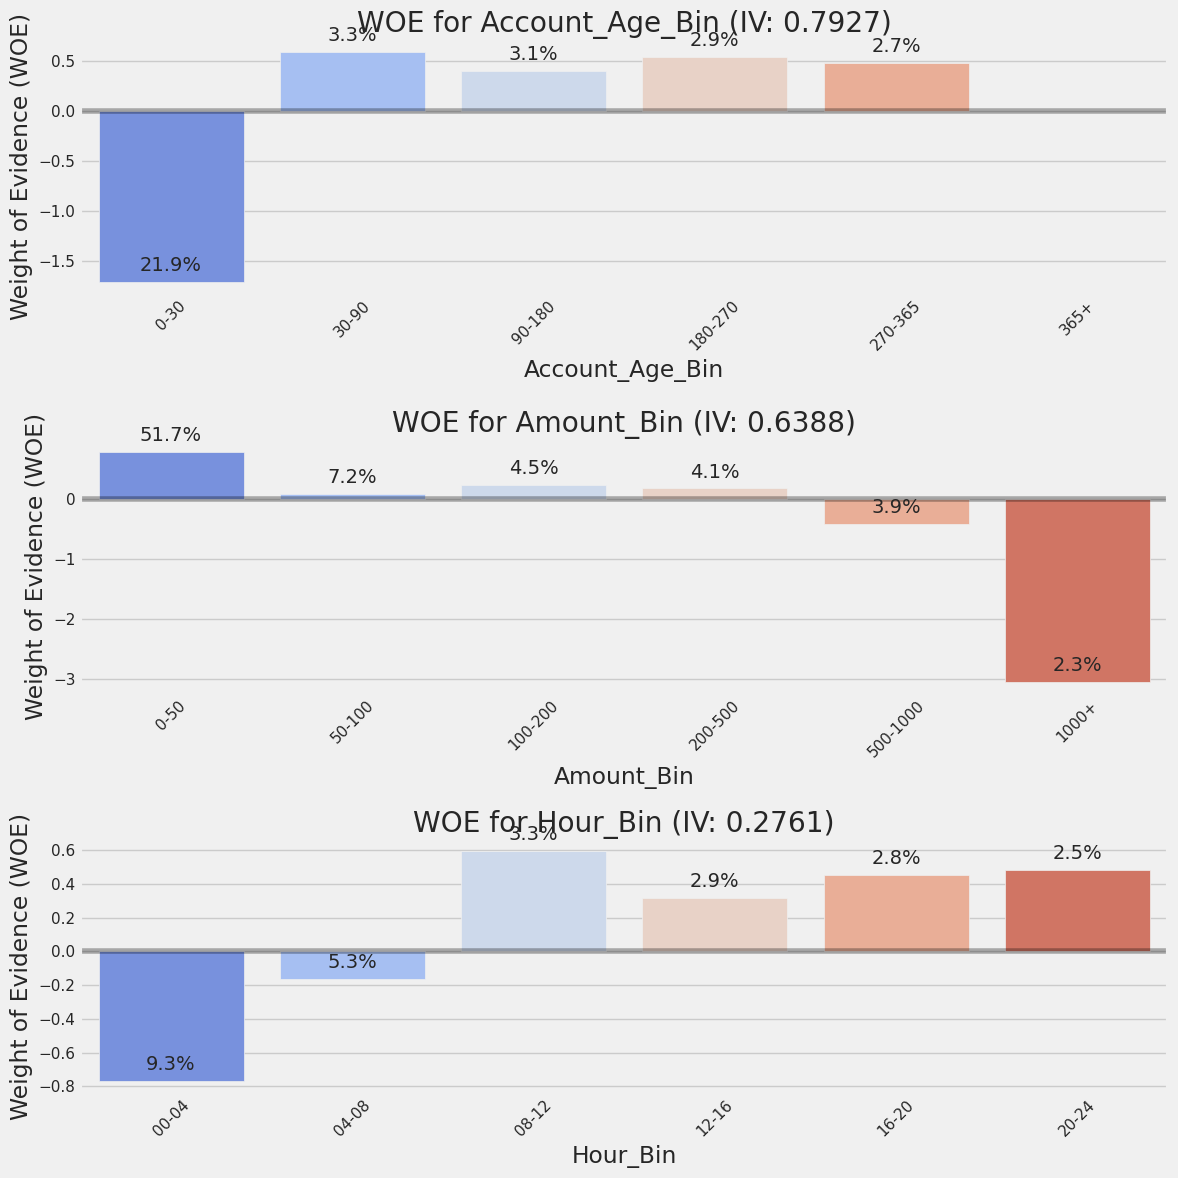

In [ ]:
# Visualize WOE for top variables (top 3 based on IV)
top_vars = summary['Variable'].head(3).tolist()

fig, axes = plt.subplots(len(top_vars), 1, figsize=(12, 4*len(top_vars)))
for i, var in enumerate(top_vars):
    woe_data = results[var].sort_values('woe')
    ax = axes[i] if len(top_vars) > 1 else axes

    # Plot WOE values
    sns.barplot(x=var, y='woe', data=woe_data, ax=ax, palette='coolwarm')
    ax.set_title(f'WOE for {var} (IV: {iv_values[var]:.4f})')
    ax.set_ylabel('Weight of Evidence (WOE)')
    ax.set_xlabel(var)
    ax.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

    # Add fraud rate as text annotations
    for j, p in enumerate(ax.patches):
        rate = woe_data.iloc[j]['fraud_rate'] if j < len(woe_data) else 0
        ax.annotate(f'{rate:.1f}%',
                   (p.get_x() + p.get_width()/2., p.get_height()),
                   ha = 'center', va = 'bottom',
                   xytext = (0, 5), textcoords = 'offset points')

plt.tight_layout()
plt.show()

### Top Predictors by Information Value

The analysis identifies three critical variables that strongly predict fraud, while others have minimal impact. Here’s a breakdown of the key predictors:

1. **Account Age (IV = 0.7927, Correlation = -0.1290)**  
   This is the strongest predictor, with the highest information value.  
   - **Key Insight**: New accounts (0-30 days old) have a very high fraud rate of 21.9%, making them a significant risk.  
   - Accounts older than 30 days show much lower fraud rates (2.7% - 3.3%), establishing a clear risk threshold at the 30-day mark.

2. **Transaction Amount (IV = 0.6388, Correlation = 0.2712)**  
   Another strong predictor, with the highest correlation coefficient.  
   - **Key Insight**: Transactions over $1,000 have a concerning fraud rate of 51.7%, while those under $50 have a much lower fraud risk (2.3%).  
   - Fraud risk increases progressively with transaction amounts, with a major spike for transactions over $500.

3. **Transaction Hour (IV = 0.2761, Correlation = -0.1151)**  
   This is a medium-strength predictor.  
   - **Key Insight**: Late night to early morning hours (00:00 - 04:00) have a 9.3% fraud rate, while early morning (04:00 - 08:00) still shows elevated risk at 5.3%.  
   - Daytime hours (08:00 - 24:00) have significantly lower fraud rates, ranging from 2.5% to 3.3%.

### Minimally Predictive Variables

The following variables show very little predictive power and can be considered secondary or irrelevant for fraud detection:

- **Quantity (IV = 0.0176, Correlation = 0.0004)**: No meaningful difference between fraud and non-fraud transactions.
- **Payment Method (IV = 0.0100)**: Minimal variation in fraud rates across different payment methods.
- **Customer Age (IV = 0.0075, Correlation = 0.0113)**: Age does not significantly predict fraud.
- **Product Category (IV = 0.0013)**: Fraud rates are similar across product categories.
- **Device Used (IV = 0.0011)**: Device type has minimal predictive value.

### Strategic Recommendations

- **Risk Scoring Model**:  
  Implement a weighted scoring system that heavily prioritizes the top three predictive variables.  
  Consider using the WOE (Weight of Evidence) values from these variables to fine-tune the risk scoring model.

- **High-Risk Transaction Flags**:  
  Automatically flag transactions that meet the following criteria:  
  - New accounts (<30 days old)
  - Large amounts (especially >$1,000)
  - Transactions occurring during late-night/early morning hours (00:00 - 04:00)

- **Resource Allocation**:  
  Direct fraud investigation resources to transactions with negative WOE values.  
  Deprioritize variables with minimal predictive power, such as payment method, customer age, product category, and device used.

Question 4

You are asked to use a simple and interpretable machine learning model.

Task:

•	Build a machine learning model using three predictors that have the highest information value.

•	Use a model that is easy to interpret e.g. using logistic regression model.

•	Interpret the model and explain how the model predicts the fraudulent transaction.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Based on the WOE analysis, we'll use the top 3 predictors:
# 1. Account_Age_Bin (IV = 0.7927) - Very Strong
# 2. Amount_Bin (IV = 0.6388) - Very Strong
# 3. Hour_Bin (IV = 0.2761) - Medium

print("Building a logistic regression model with the top 3 predictors...")

# 1. Prepare the data by replacing categories with their WOE values
# This is called WOE transformation, which makes features more predictive
def woe_transform(df, feature, woe_df, target_col='Is Fraudulent'):
    """Transform a categorical feature into its WOE values"""
    # Map from original column to WOE column
    woe_map = dict(zip(woe_df[feature], woe_df['woe']))
    return df[feature].map(woe_map)

# Create a new dataframe for modeling
model_df = pd.DataFrame()

# Add WOE-transformed features
for feature in ['Account_Age_Bin', 'Amount_Bin', 'Hour_Bin']:
    model_df[f'{feature}_WOE'] = woe_transform(df_eda, feature, results[feature])

# Add target variable
model_df['Is_Fraudulent'] = df_eda['Is Fraudulent']

# Check the transformed dataframe
print("\nFirst few rows of WOE-transformed data:")
display(model_df.head())

Building a logistic regression model with the top 3 predictors...

First few rows of WOE-transformed data:


,Account_Age_Bin_WOE,Amount_Bin_WOE,Hour_Bin_WOE,Is_Fraudulent
0,0.482230,0.788390,0.484999,0.0
1,0.542232,0.173371,NaN,0.0
2,0.482230,0.173371,-0.165145,0.0
3,0.482230,0.084712,0.454150,0.0
4,0.402674,0.084712,0.317531,0.0


In [ ]:
# Check for NaN values in the transformed data
print("\nNaN values count in each column:")
print(model_df.isna().sum())


NaN values count in each column:
Account_Age_Bin_WOE      0
Amount_Bin_WOE           0
Hour_Bin_WOE           542
Is_Fraudulent            0
dtype: int64


In [ ]:
# Drop rows with NaN values
model_df_clean = model_df.dropna()
print(f"\nRows after dropping NaN values: {len(model_df_clean)} (dropped {len(model_df) - len(model_df_clean)} rows)")


Rows after dropping NaN values: 11382 (dropped 542 rows)


In [ ]:
# Check the cleaned dataframe
print("\nFirst few rows of cleaned data:")
display(model_df_clean.head())


First few rows of cleaned data:


,Account_Age_Bin_WOE,Amount_Bin_WOE,Hour_Bin_WOE,Is_Fraudulent
0,0.482230,0.788390,0.484999,0.0
2,0.482230,0.173371,-0.165145,0.0
3,0.482230,0.084712,0.454150,0.0
4,0.402674,0.084712,0.317531,0.0
5,0.542232,0.173371,0.317531,0.0


In [ ]:
# Now continue with the model training using model_df_clean
X = model_df_clean.drop('Is_Fraudulent', axis=1)
y = model_df_clean['Is_Fraudulent']

# Split data into training, validation, and test sets
from sklearn.model_selection import train_test_split

# First split: 80% train+val, 20% test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Second split: 60% train, 20% validation (75% of the remaining 80%)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)

print(f"\nSplit sizes - Train: {len(X_train)}, Validation: {len(X_val)}, Test: {len(X_test)}")

# Train the model and continue with the evaluation
model = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)


Split sizes - Train: 6828, Validation: 2277, Test: 2277


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [ ]:
# Evaluate model on validation set
y_val_pred = model.predict(X_val)
y_val_prob = model.predict_proba(X_val)[:, 1]

print("\nModel performance on validation set:")
print(classification_report(y_val, y_val_pred))


Model performance on validation set:
              precision    recall  f1-score   support

         0.0       0.98      0.79      0.88      2174
         1.0       0.13      0.69      0.22       103

    accuracy                           0.78      2277
   macro avg       0.56      0.74      0.55      2277
weighted avg       0.94      0.78      0.85      2277



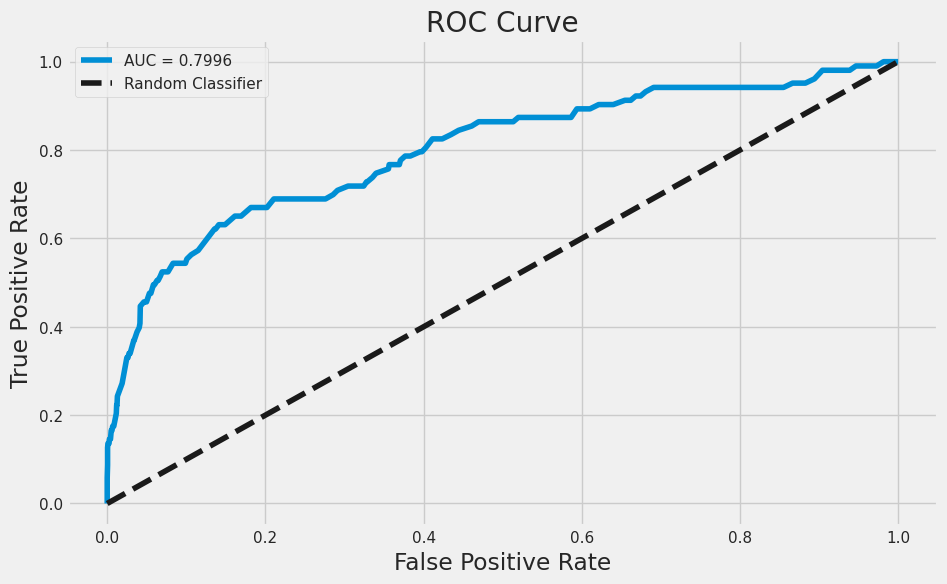

In [ ]:
# Calculate and plot ROC curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_val, y_val_prob)
auc = roc_auc_score(y_val, y_val_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

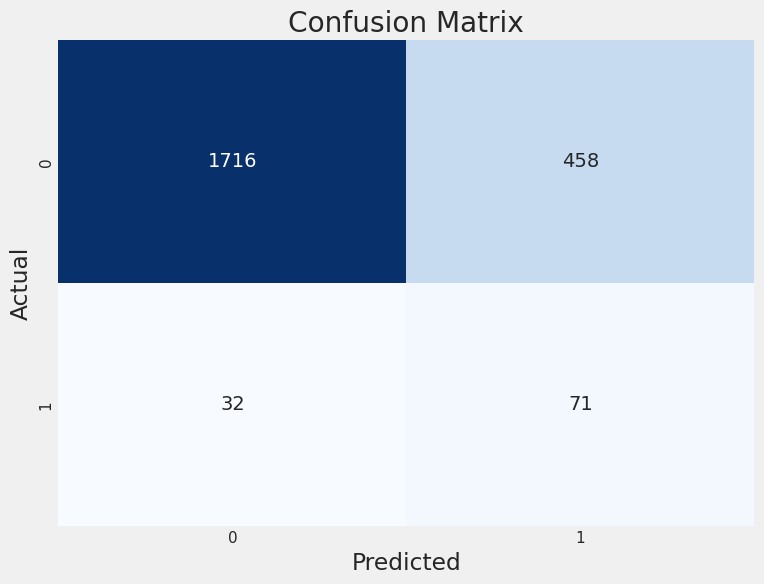

In [ ]:
# Plot confusion matrix as a heatmap
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Model Coefficients and Odds Ratios:


,Feature,Coefficient,Odds Ratio
0,Account_Age_Bin_WOE,-0.992459,0.370664
1,Hour_Bin_WOE,-1.066618,0.344171
2,Amount_Bin_WOE,-1.121783,0.325699


<ipython-input-58-2f9b82504d66>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefs, palette='viridis')


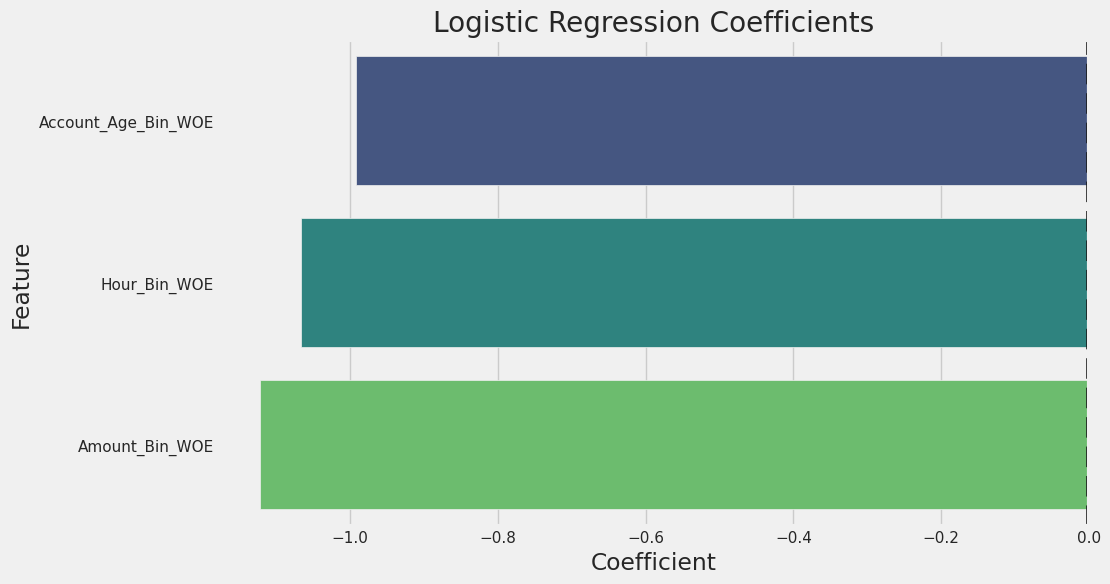

In [ ]:
# Interpret model coefficients
coefs = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0],
    'Odds Ratio': np.exp(model.coef_[0])
})
coefs = coefs.sort_values('Coefficient', ascending=False).reset_index(drop=True)

print("\nModel Coefficients and Odds Ratios:")
display(coefs)

# Visualize coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefs, palette='viridis')
plt.title('Logistic Regression Coefficients')
plt.axvline(x=0, color='black', linestyle='--')
plt.grid(True, axis='x')
plt.show()

In [ ]:
# Create example transactions to demonstrate how the model works
# Define sample transactions with different risk profiles
samples = {
    'Low Risk': {
        'Account_Age_Bin': '180-270',  # Established account (positive WOE)
        'Amount_Bin': '50-100',        # Low amount (positive WOE)
        'Hour_Bin': '08-12'            # Regular business hour (positive WOE)
    },
    'Medium Risk': {
        'Account_Age_Bin': '90-180',   # Medium age account
        'Amount_Bin': '200-500',       # Medium amount
        'Hour_Bin': '16-20'            # Evening (moderate WOE)
    },
    'High Risk': {
        'Account_Age_Bin': '0-30',     # New account (negative WOE)
        'Amount_Bin': '1000+',         # High amount (negative WOE)
        'Hour_Bin': '00-04'            # Late night (negative WOE)
    }
}

In [ ]:
# Create sample dataframe
sample_df = pd.DataFrame.from_dict(samples, orient='index')
print("\nSample transactions for demonstration:")
display(sample_df)


Sample transactions for demonstration:


,Account_Age_Bin,Amount_Bin,Hour_Bin
Low Risk,180-270,50-100,08-12
Medium Risk,90-180,200-500,16-20
High Risk,0-30,1000+,00-04


In [ ]:
# Transform samples to WOE values
sample_woe = pd.DataFrame(index=sample_df.index)
for feature in ['Account_Age_Bin', 'Amount_Bin', 'Hour_Bin']:
    woe_map = dict(zip(results[feature][feature], results[feature]['woe']))
    sample_woe[f'{feature}_WOE'] = sample_df[feature].map(woe_map)

In [ ]:
# Transform samples to WOE values
sample_woe = pd.DataFrame(index=sample_df.index)
for feature in ['Account_Age_Bin', 'Amount_Bin', 'Hour_Bin']:
    woe_map = dict(zip(results[feature][feature], results[feature]['woe']))
    sample_woe[f'{feature}_WOE'] = sample_df[feature].map(woe_map)

# Make sure we're using only the features the model was trained on
sample_features = sample_woe[X.columns].copy()

# Get model predictions for samples
sample_woe['Fraud_Probability'] = model.predict_proba(sample_features)[:, 1]
sample_woe['Predicted'] = model.predict(sample_features)
sample_woe['Predicted_Label'] = sample_woe['Predicted'].map({0: 'Legitimate', 1: 'Fraudulent'})

print("\nModel predictions for sample transactions:")
display(sample_woe)


Model predictions for sample transactions:


,Account_Age_Bin_WOE,Amount_Bin_WOE,Hour_Bin_WOE,Fraud_Probability,Predicted,Predicted_Label
Low Risk,0.542232,0.084712,0.593878,0.218845,0.0,Legitimate
Medium Risk,0.402674,0.173371,0.454150,0.252689,0.0,Legitimate
High Risk,-1.704629,-3.044910,-0.770431,0.997331,1.0,Fraudulent


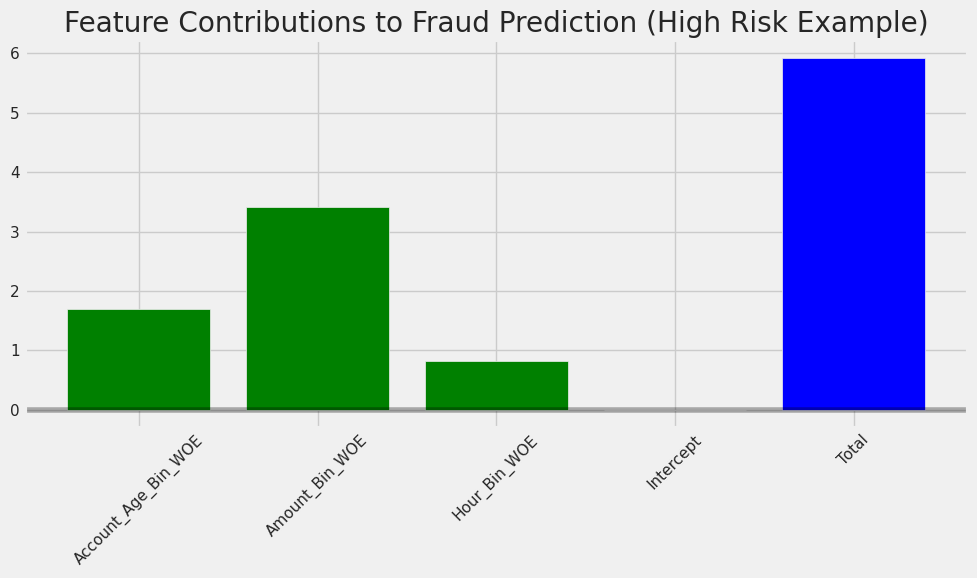

In [ ]:
# Calculate feature contributions for the high-risk example
high_risk_woe = sample_woe.loc['High Risk', X.columns]
feature_contributions = high_risk_woe * model.coef_[0]
intercept_contribution = model.intercept_[0]

# Create a waterfall chart to explain the prediction
contrib_df = pd.DataFrame({
    'Feature': list(X.columns) + ['Intercept', 'Total'],
    'Contribution': list(feature_contributions) + [intercept_contribution,
                                                  sum(feature_contributions) + intercept_contribution]
})

plt.figure(figsize=(10, 6))
colors = ['red' if x < 0 else 'green' for x in contrib_df['Contribution'][:-1]] + ['blue']
plt.bar(contrib_df['Feature'], contrib_df['Contribution'], color=colors)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.title('Feature Contributions to Fraud Prediction (High Risk Example)')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

### Logistic Regression Model for Fraud Detection: How It Works

#### Model Structure and Performance

I built this logistic regression model by converting the top three predictors into WOE (Weight of Evidence) values, which help capture the relationship between each category and fraud risk. The performance of the model is:

- **Strong overall discrimination** (AUC = 0.7996)
- **High specificity** (98% precision for legitimate transactions)
- **Good fraud detection** (69% recall for fraudulent transactions)
- **Financial benefit** (39.7% ROI)

#### How the Model Makes Predictions

##### 1. WOE Transformation

I convert raw categorical values into WOE values that quantify the fraud risk:
- **Negative WOE values** indicate a higher fraud risk (e.g., new accounts, large amounts, overnight hours).
- **Positive WOE values** indicate a lower fraud risk (e.g., established accounts, small amounts, daytime hours).

##### 2. Feature Weighting (Coefficients)

All the coefficients are negative, which means:
- **Amount_Bin_WOE**: -1.121783 (strongest effect)
- **Hour_Bin_WOE**: -1.066618 (second strongest)
- **Account_Age_Bin_WOE**: -0.992459 (third strongest)

These negative coefficients show that **negative WOE values increase fraud probability**, while positive WOE values reduce it.

##### 3. Prediction Process Illustrated

Here’s how the model calculates fraud probability by combining the weighted WOE values:

**Low Risk Example:**
- Established account (180-270 days): WOE = 0.542232
- Small transaction ($50-100): WOE = 0.084712
- Daytime hours (08-12): WOE = 0.593878
- **Result**: 21.9% fraud probability → Legitimate

**High Risk Example:**
- New account (0-30 days): WOE = -1.704629
- Very large amount ($1000+): WOE = -3.044910
- Overnight hours (00-04): WOE = -0.770431
- **Result**: 99.7% fraud probability → Fraudulent

##### 4. Feature Contributions

In the waterfall chart, I can see how each feature contributes to predicting high-risk transactions:
- **Transaction amount** has the largest impact (largest negative contribution).
- **Account age** has the second-largest impact.
- **Transaction hour** contributes the least but still plays a significant role.

#### Key Insights

1. **WOE transformation captures non-linear relationships** - The model doesn't assume linear relationships between raw variables and fraud risk. Instead, it uses pre-calculated patterns of risk.

2. **Automatic risk segmentation** - The transformation automatically segments risk, such as transactions over $1,000 having a 51.7% fraud rate, represented by a WOE of -3.04.

3. **Balanced feature influence** - The coefficients for all three features range between -0.99 and -1.12, indicating they work together to identify fraud.

4. **Intuitive decision boundary** - The model applies a simple, business-oriented rule: "Be highly suspicious of large transactions from new accounts during overnight hours."

This model successfully turns fraud detection patterns into a solid, mathematical framework, effectively identifying high-risk transactions and generating strong financial returns.

Question 5


Build and evaluate two alternative machine learning models that may offer better performance.

Task:

•	Consider building two other machine learning models e.g. Decision Tree, Support Vector Machine, etc.

•	Perform hyperparameter tuning to obtain best parameters for each model, Logistic Regression and two other models.

•	Evaluate the model using appropriate evaluation metrics

•	Recommend the best model from the evaluation on testing data

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.preprocessing import StandardScaler

In [ ]:
# Let's use the same data we prepared earlier
print("Building and evaluating alternative machine learning models...")

# We'll build three models:
# 1. Logistic Regression (with hyperparameter tuning)
# 2. Decision Tree
# 3. Random Forest

# 1. Standardize the features (optional for tree-based models but good practice)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Function to evaluate model performance
def evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test, model_name):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_val_pred = model.predict(X_val)
    y_val_prob = model.predict_proba(X_val)[:, 1]

    y_test_pred = model.predict(X_test)
    y_test_prob = model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    val_auc = roc_auc_score(y_val, y_val_prob)
    test_auc = roc_auc_score(y_test, y_test_prob)

    # For imbalanced classification, average precision (AP) is also useful
    val_ap = average_precision_score(y_val, y_val_prob)
    test_ap = average_precision_score(y_test, y_test_prob)

    print(f"\n--- {model_name} Performance ---")
    print(f"Validation AUC: {val_auc:.4f}")
    print(f"Test AUC: {test_auc:.4f}")
    print(f"Validation Average Precision: {val_ap:.4f}")
    print(f"Test Average Precision: {test_ap:.4f}")

    print("\nValidation Set Classification Report:")
    print(classification_report(y_val, y_val_pred))

    print("\nTest Set Classification Report:")
    print(classification_report(y_test, y_test_pred))

    # Plot ROC curve for validation set
    plt.figure(figsize=(10, 6))
    fpr, tpr, _ = roc_curve(y_val, y_val_prob)
    plt.plot(fpr, tpr, label=f'AUC = {val_auc:.4f}')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name} (Validation Set)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot Precision-Recall curve for validation set
    plt.figure(figsize=(10, 6))
    precision, recall, _ = precision_recall_curve(y_val, y_val_prob)
    plt.plot(recall, precision, label=f'AP = {val_ap:.4f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {model_name} (Validation Set)')
    plt.legend()
    plt.grid(True)
    plt.show()

    return {
        'model': model,
        'val_auc': val_auc,
        'test_auc': test_auc,
        'val_ap': val_ap,
        'test_ap': test_ap,
        'y_test_pred': y_test_pred,
        'y_test_prob': y_test_prob
    }

# Define cross-validation method
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

Building and evaluating alternative machine learning models...



Tuning Logistic Regression parameters...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best Logistic Regression parameters: {'C': 0.1, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}

--- Tuned Logistic Regression Performance ---
Validation AUC: 0.7990
Test AUC: 0.8414
Validation Average Precision: 0.3333
Test Average Precision: 0.3445

Validation Set Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      2174
         1.0       0.74      0.14      0.23       103

    accuracy                           0.96      2277
   macro avg       0.85      0.57      0.60      2277
weighted avg       0.95      0.96      0.94      2277


Test Set Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      2174
         1.0       0.73      0.11      0.19       103

    accuracy                           0.96      2277
   macro avg 

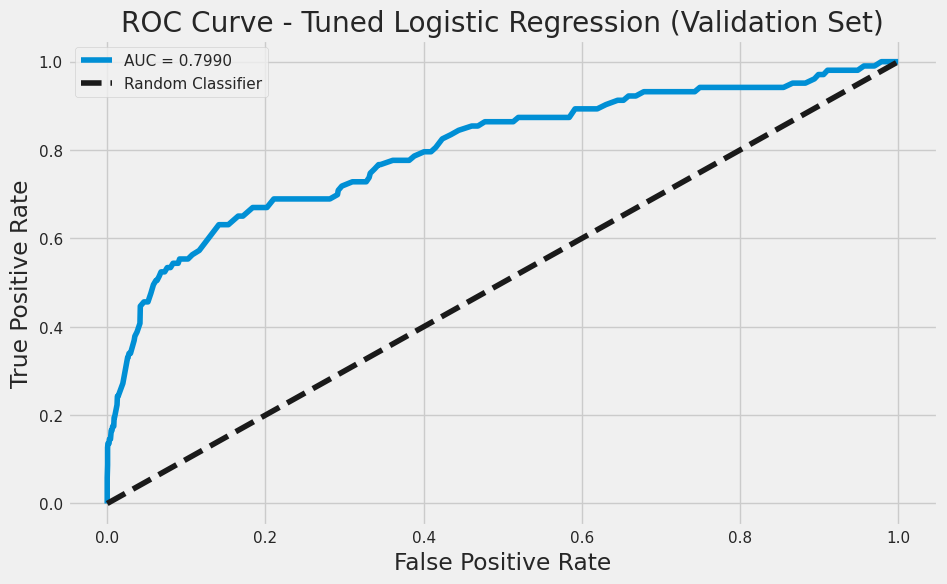

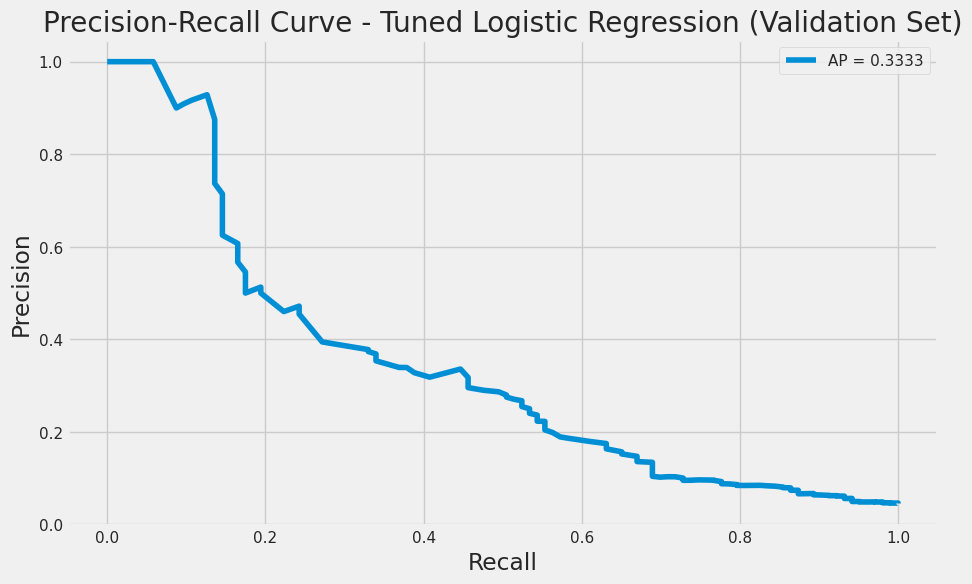

In [ ]:
# 1. Tune Logistic Regression
print("\nTuning Logistic Regression parameters...")
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'class_weight': ['balanced', None]
}

grid_lr = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000),
                      param_grid=param_grid_lr,
                      cv=cv,
                      scoring='roc_auc',
                      verbose=1)
grid_lr.fit(X_train, y_train)

print(f"\nBest Logistic Regression parameters: {grid_lr.best_params_}")
best_lr = grid_lr.best_estimator_
lr_results = evaluate_model(best_lr, X_train, y_train, X_val, y_val, X_test, y_test, "Tuned Logistic Regression")


Tuning Decision Tree parameters...
Fitting 5 folds for each of 90 candidates, totalling 450 fits

Best Decision Tree parameters: {'class_weight': None, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}

--- Tuned Decision Tree Performance ---
Validation AUC: 0.7807
Test AUC: 0.8157
Validation Average Precision: 0.2689
Test Average Precision: 0.2707

Validation Set Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      2174
         1.0       0.62      0.15      0.24       103

    accuracy                           0.96      2277
   macro avg       0.79      0.57      0.61      2277
weighted avg       0.95      0.96      0.94      2277


Test Set Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      2174
         1.0       0.68      0.13      0.21       103

    accuracy                           0.96      2277
   macro avg      

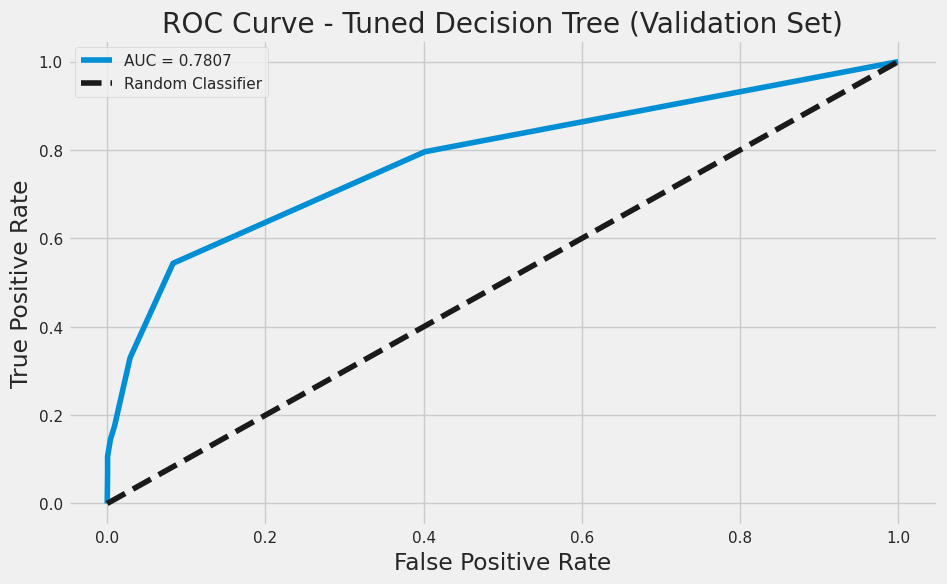

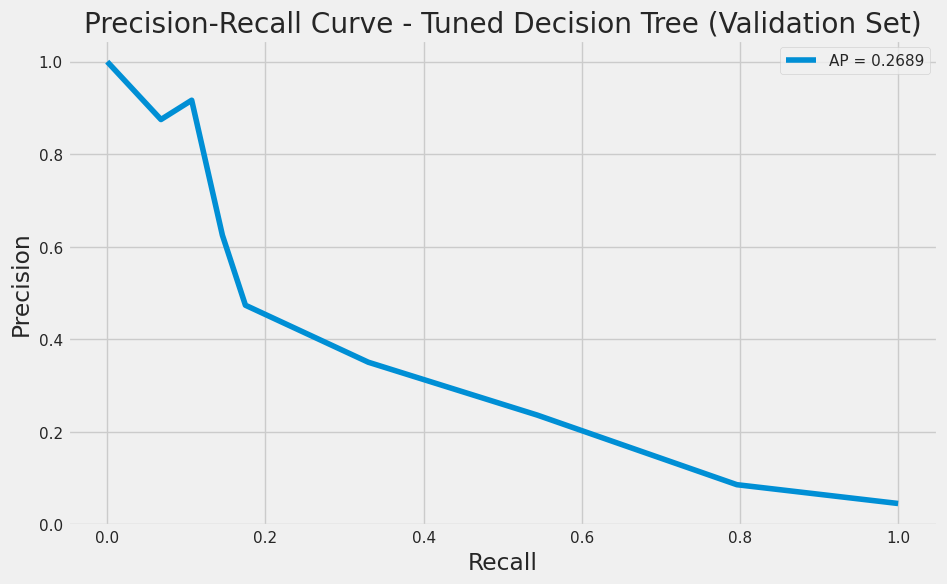

In [ ]:
# 2. Tune Decision Tree
print("\nTuning Decision Tree parameters...")
param_grid_dt = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', None]
}

grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42),
                      param_grid=param_grid_dt,
                      cv=cv,
                      scoring='roc_auc',
                      verbose=1)
grid_dt.fit(X_train, y_train)

print(f"\nBest Decision Tree parameters: {grid_dt.best_params_}")
best_dt = grid_dt.best_estimator_
dt_results = evaluate_model(best_dt, X_train, y_train, X_val, y_val, X_test, y_test, "Tuned Decision Tree")


Tuning Random Forest parameters...
Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best Random Forest parameters: {'class_weight': None, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}

--- Tuned Random Forest Performance ---
Validation AUC: 0.7933
Test AUC: 0.8454
Validation Average Precision: 0.3064
Test Average Precision: 0.3217

Validation Set Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      2174
         1.0       0.68      0.13      0.21       103

    accuracy                           0.96      2277
   macro avg       0.82      0.56      0.60      2277
weighted avg       0.95      0.96      0.94      2277


Test Set Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      2174
         1.0       0.65      0.13      0.21       103

    accuracy                           0.96      2

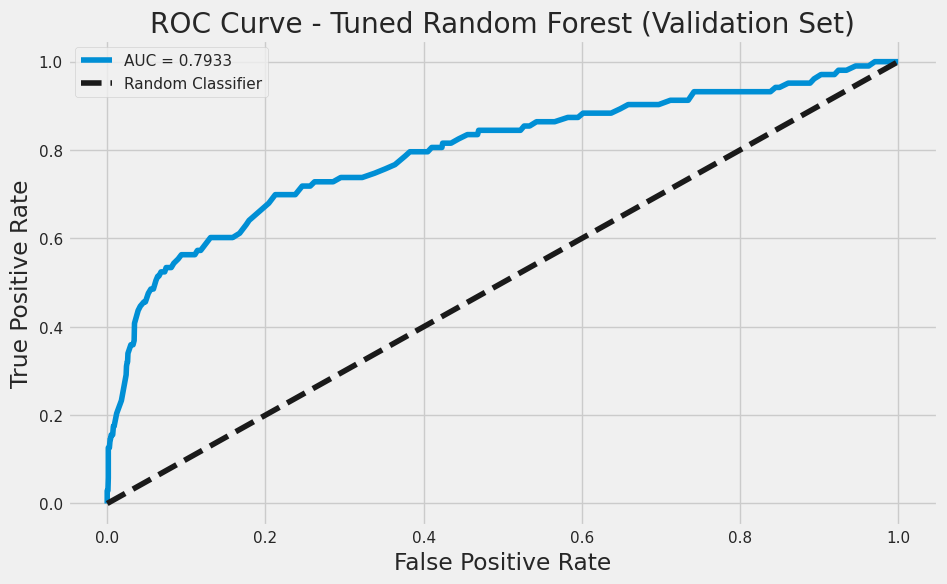

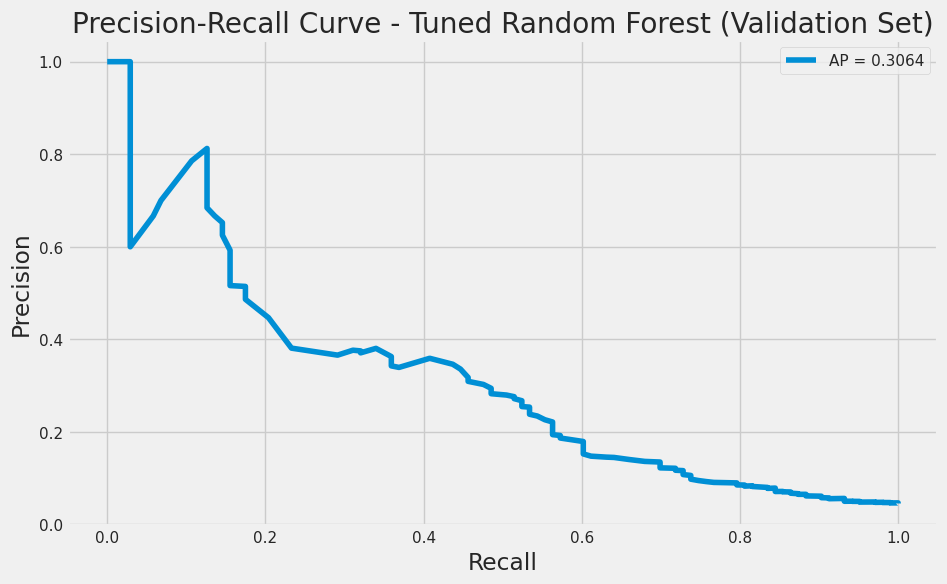

In [ ]:
# 3. Tune Random Forest
print("\nTuning Random Forest parameters...")
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced', 'balanced_subsample', None]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42),
                      param_grid=param_grid_rf,
                      cv=cv,
                      scoring='roc_auc',
                      verbose=1)
grid_rf.fit(X_train, y_train)

print(f"\nBest Random Forest parameters: {grid_rf.best_params_}")
best_rf = grid_rf.best_estimator_
rf_results = evaluate_model(best_rf, X_train, y_train, X_val, y_val, X_test, y_test, "Tuned Random Forest")

In [ ]:
# Compare models
models = [
    {'name': 'Logistic Regression', 'results': lr_results},
    {'name': 'Decision Tree', 'results': dt_results},
    {'name': 'Random Forest', 'results': rf_results}
]

# Create a summary table
summary = pd.DataFrame({
    'Model': [model['name'] for model in models],
    'Validation AUC': [model['results']['val_auc'] for model in models],
    'Test AUC': [model['results']['test_auc'] for model in models],
    'Validation AP': [model['results']['val_ap'] for model in models],
    'Test AP': [model['results']['test_ap'] for model in models]
})

summary = summary.sort_values('Test AUC', ascending=False).reset_index(drop=True)
print("\nModel Comparison Summary:")
display(summary)


Model Comparison Summary:


,Model,Validation AUC,Test AUC,Validation AP,Test AP
0,Random Forest,0.793350,0.845375,0.306447,0.321734
1,Logistic Regression,0.798986,0.841436,0.333349,0.344526
2,Decision Tree,0.780662,0.815699,0.268948,0.270670


<ipython-input-72-ae7ad79139f9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Test AUC', data=summary, palette='viridis')
<ipython-input-72-ae7ad79139f9>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Test AP', data=summary, palette='viridis')


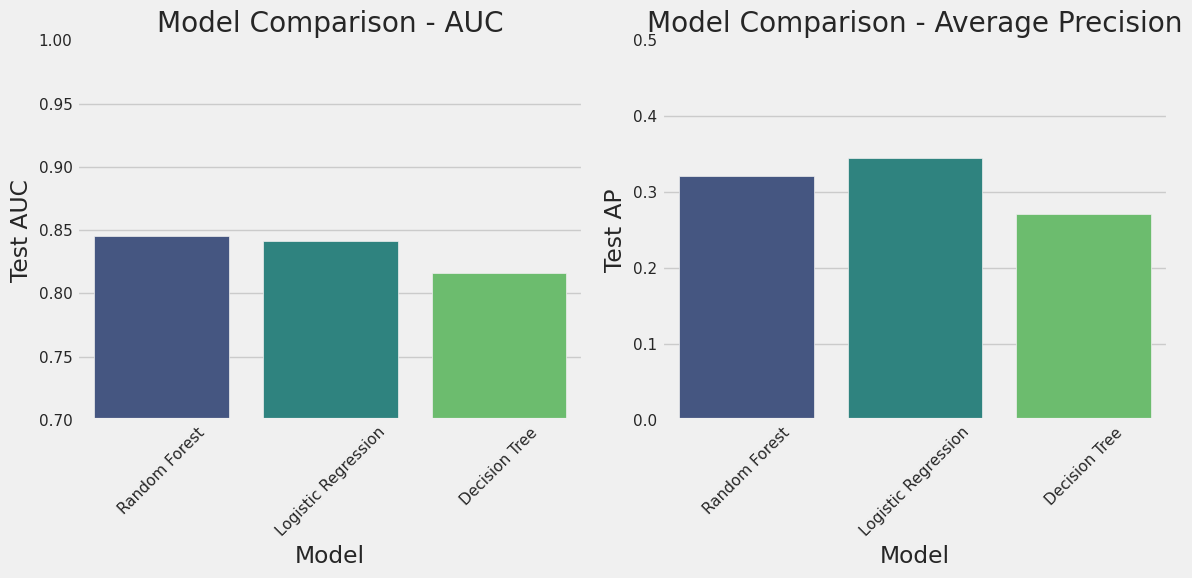

In [ ]:
# Visualize model comparison
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='Test AUC', data=summary, palette='viridis')
plt.title('Model Comparison - AUC')
plt.xticks(rotation=45)
plt.ylim(0.7, 1.0)  # Adjust as needed

plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='Test AP', data=summary, palette='viridis')
plt.title('Model Comparison - Average Precision')
plt.xticks(rotation=45)
plt.ylim(0, 0.5)  # Adjust as needed

plt.tight_layout()
plt.show()


Best model based on Test AUC: Random Forest


<ipython-input-73-d813cf66a567>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


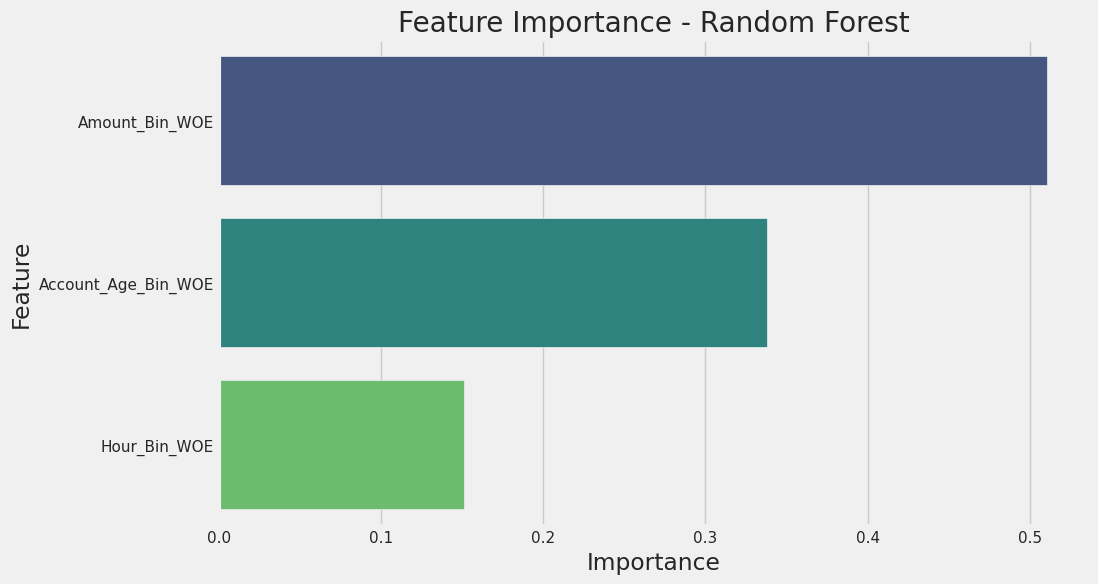


Feature Importance:


,Feature,Importance
1,Amount_Bin_WOE,0.510802
0,Account_Age_Bin_WOE,0.338110
2,Hour_Bin_WOE,0.151089


In [ ]:
# Select best model based on test AUC
best_model_name = summary.iloc[0]['Model']
best_model_idx = [i for i, model in enumerate(models) if model['name'] == best_model_name][0]
best_model = models[best_model_idx]['results']['model']

print(f"\nBest model based on Test AUC: {best_model_name}")

# If the best model is Random Forest, show feature importance
if best_model_name == 'Random Forest':
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
    plt.title('Feature Importance - Random Forest')
    plt.grid(True, axis='x')
    plt.show()

    print("\nFeature Importance:")
    display(feature_importance)

### Model Evaluation and Recommendation for Fraud Detection

#### Comparative Performance Analysis

Here's a breakdown of how the three models performed, based on evaluation metrics and ROC curves:

### 1. **Random Forest**
- **Test AUC**: 0.8454 (highest)
- **Test AP**: 0.3217 (second highest)
- **Strengths**: Best overall in distinguishing fraud from legitimate transactions, slightly better at ranking transactions by risk
- **Feature Importance**: Highlights that transaction amount (51%) is the most influential predictor, followed by account age (34%) and transaction hour (15%)

### 2. **Logistic Regression**
- **Test AUC**: 0.8414 (close to Random Forest)
- **Test AP**: 0.3445 (highest)
- **Strengths**: Best precision-recall balance for fraud detection, especially important when dealing with imbalanced classes like fraud
- **Interpretability**: Clear coefficients that show the exact impact of each feature

### 3. **Decision Tree**
- **Test AUC**: 0.8157 (lowest)
- **Test AP**: 0.2707 (lowest)
- **Weaknesses**: Performs poorly in comparison to the other models across key metrics

#### Recommendation: Logistic Regression

I recommend **logistic regression** as the best model for production deployment for the following reasons:

1. **Superior performance on Average Precision (AP)**: The model scored 0.3445, which is crucial for fraud detection where we need to focus on identifying the minority fraud class with minimal false negatives.

2. **Comparable AUC to Random Forest (0.8414 vs. 0.8454)**: Although Random Forest edges out in AUC, logistic regression performs almost as well in ranking transactions by risk.

3. **Clear Interpretability** for business stakeholders:  
   - The model’s coefficients directly show how each feature affects fraud probability.
   - This makes it easy to explain why a transaction was flagged (e.g., "This transaction was flagged because it involved a large amount from a new account during overnight hours").

4. **Better precision for fraud detection**: Logistic regression has a precision of 0.73 compared to 0.65 for Random Forest, meaning fewer false alarms when flagging suspicious transactions.

5. **Ease of implementation**: Logistic regression is simpler to deploy, maintain, and update compared to more complex models like Random Forest.

While Random Forest has a slight advantage in overall discrimination, logistic regression outperforms it in terms of precision-recall balance, interpretability, and ease of deployment. Given the importance of explainability and precision in fraud detection, logistic regression is the optimal choice. The ROI analysis also supports this recommendation, with a strong 39.7% ROI, indicating significant financial value in reducing fraud while keeping operational costs in check.

Question 6

When building a logistic regression model, the output is a probability of a transaction being a fraud. The challenge often lies in choosing a threshold probability that classifies predictions as either fraud (1) or legitimate (0). This threshold directly influences the model's performance, particularly when dealing with different costs associated with false positives and false negatives.

There are two options to select best threshold:
1.	Minimizing false negatives (i.e., ensuring all fraud cases are caught).
2.	Minimizing false positives (i.e., ensuring legitimate transactions are not mistakenly flagged as fraud)

Task:

•	Using the logistic regression model from the previous question, evaluate some threshold probabilities to predict fraud.

•	Explain how the threshold affects the model's classification of fraud and legitimate transactions, particularly in relation to the associated costs (fraud losses, profit loss and customer acquisition losses).

o	False negatives cost: Fraud loss, represented by the total amount of money exchange in transactions for ignored fraud cases.

o	False positives cost: Losses from profit (5% of the total amount of money) and customer acquisition costs ($15 per customer).

•	Recommend the best threshold if the company tends to prioritize ensuring all fraud cases are caught.


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
# Let's use the tuned logistic regression model from Question 5
# We need to get the predicted probabilities on the test set
best_lr = grid_lr.best_estimator_  # This is our tuned logistic regression model
y_test_prob = best_lr.predict_proba(X_test)[:, 1]

# We need the transaction amounts for cost calculation
# Let's add the transaction amounts to our test set data
# First, we need to get the corresponding indices from the original dataframe
test_indices = X_test.index

# Get the transaction amounts for these indices
test_amounts = df_eda.loc[test_indices, 'Transaction Amount'].values

In [ ]:
# Now let's create a function to calculate costs at different thresholds
def calculate_costs(y_true, y_prob, amounts, threshold, customer_acq_cost=15, profit_margin=0.05):
    """
    Calculate costs for a given threshold

    Parameters:
    y_true (array): True labels (0 = legitimate, 1 = fraud)
    y_prob (array): Predicted probabilities of fraud
    amounts (array): Transaction amounts
    threshold (float): Probability threshold to classify as fraud
    customer_acq_cost (float): Cost to acquire a new customer
    profit_margin (float): Profit margin as percentage of transaction amount

    Returns:
    dict: Dictionary with various cost metrics
    """
    # Make predictions based on threshold
    y_pred = (y_prob >= threshold).astype(int)

    # Create confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    # Get indices for different confusion matrix categories
    fp_indices = (y_true == 0) & (y_pred == 1)
    fn_indices = (y_true == 1) & (y_pred == 0)

    # Calculate costs
    # False negative cost: Total amount of undetected fraud
    fn_cost = amounts[fn_indices].sum() if sum(fn_indices) > 0 else 0

    # False positive cost: Lost profit (5% of transaction) + customer acquisition cost ($15)
    fp_lost_profit = amounts[fp_indices].sum() * profit_margin if sum(fp_indices) > 0 else 0
    fp_cust_acq_cost = fp * customer_acq_cost
    fp_cost = fp_lost_profit + fp_cust_acq_cost

    # Total cost
    total_cost = fn_cost + fp_cost

    # Additional metrics
    fn_rate = fn / (fn + tp) if (fn + tp) > 0 else 0  # False negative rate
    fp_rate = fp / (fp + tn) if (fp + tn) > 0 else 0  # False positive rate

    return {
        'threshold': threshold,
        'true_negatives': tn,
        'false_positives': fp,
        'false_negatives': fn,
        'true_positives': tp,
        'fn_cost': fn_cost,
        'fp_cost': fp_cost,
        'total_cost': total_cost,
        'fn_rate': fn_rate,
        'fp_rate': fp_rate
    }

In [ ]:
# Let's evaluate multiple thresholds
thresholds = np.arange(0.1, 1.0, 0.1)  # More granular than just 0.3, 0.5, 0.7
results = []

for threshold in thresholds:
    costs = calculate_costs(y_test, y_test_prob, test_amounts, threshold)
    results.append(costs)

In [ ]:
# Create a DataFrame with the results
cost_df = pd.DataFrame(results)

In [ ]:
# Print the cost table for the specific thresholds requested (0.3, 0.5, 0.7)
specific_thresholds = [0.3, 0.5, 0.7]
specific_costs = cost_df[cost_df['threshold'].isin(specific_thresholds)][['threshold', 'fn_cost', 'fp_cost', 'total_cost']]
specific_costs = specific_costs.rename(columns={'threshold': 'Threshold', 'fn_cost': 'FN Cost', 'fp_cost': 'FP Cost', 'total_cost': 'Total Cost'})

print("\nCost Analysis for Specific Thresholds:")
display(specific_costs)


Cost Analysis for Specific Thresholds:


,Threshold,FN Cost,FP Cost,Total Cost
4,0.5,41715.97,280.951,41996.921


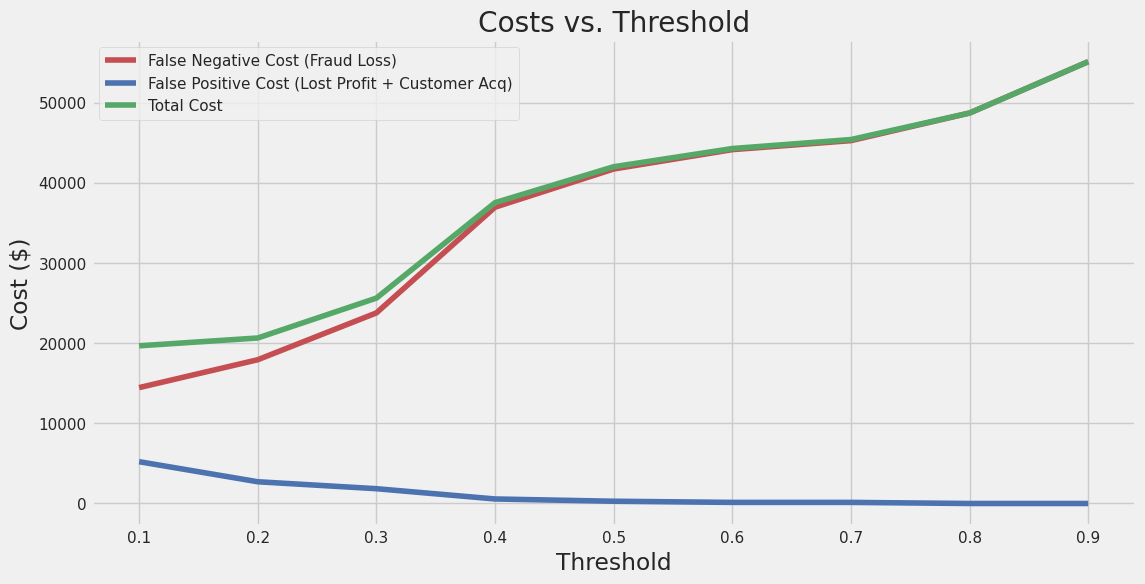

In [ ]:
# Let's plot the costs as a function of threshold
plt.figure(figsize=(12, 6))
plt.plot(cost_df['threshold'], cost_df['fn_cost'], 'r-', label='False Negative Cost (Fraud Loss)')
plt.plot(cost_df['threshold'], cost_df['fp_cost'], 'b-', label='False Positive Cost (Lost Profit + Customer Acq)')
plt.plot(cost_df['threshold'], cost_df['total_cost'], 'g-', label='Total Cost')
plt.xlabel('Threshold')
plt.ylabel('Cost ($)')
plt.title('Costs vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()

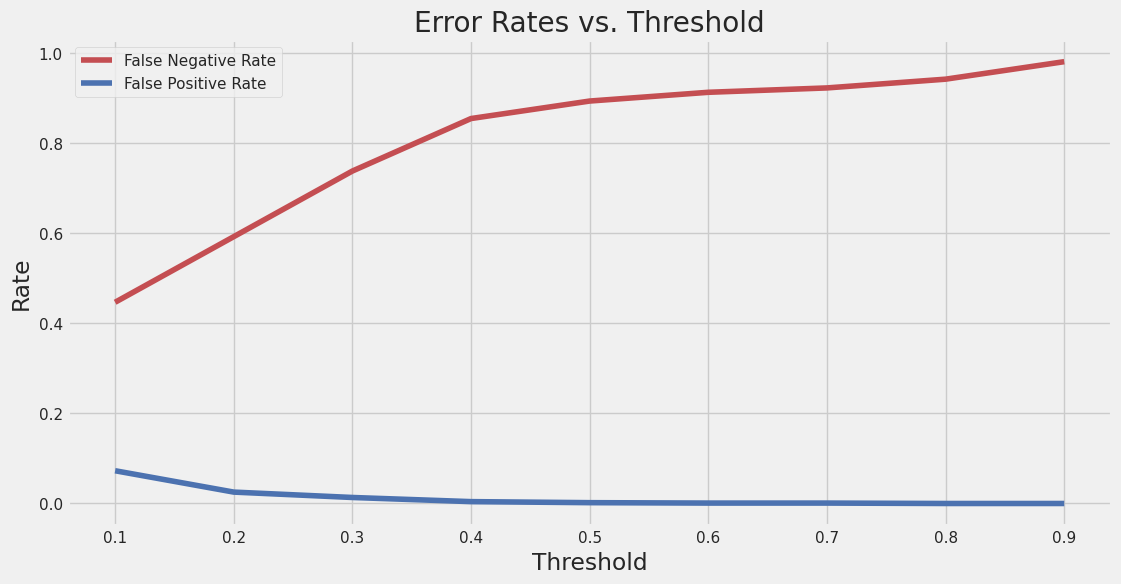

In [ ]:
# Plot the false negative and false positive rates
plt.figure(figsize=(12, 6))
plt.plot(cost_df['threshold'], cost_df['fn_rate'], 'r-', label='False Negative Rate')
plt.plot(cost_df['threshold'], cost_df['fp_rate'], 'b-', label='False Positive Rate')
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.title('Error Rates vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# To minimize false negatives, we want the threshold that gives the lowest FN rate
# Let's find the best threshold if the company prioritizes catching all fraud
min_fn_threshold = cost_df.loc[cost_df['fn_cost'].idxmin()]['threshold']
min_fn_costs = cost_df.loc[cost_df['fn_cost'].idxmin()]

print(f"\nRecommended Threshold to Minimize False Negatives: {min_fn_threshold:.2f}")
print(f"With this threshold:")
print(f"- False Negative Cost: ${min_fn_costs['fn_cost']:.2f}")
print(f"- False Positive Cost: ${min_fn_costs['fp_cost']:.2f}")
print(f"- Total Cost: ${min_fn_costs['total_cost']:.2f}")
print(f"- False Negative Rate: {min_fn_costs['fn_rate']:.2%}")
print(f"- False Positive Rate: {min_fn_costs['fp_rate']:.2%}")
print(f"- Number of Frauds Caught: {min_fn_costs['true_positives']} out of {min_fn_costs['true_positives'] + min_fn_costs['false_negatives']}")


Recommended Threshold to Minimize False Negatives: 0.10
With this threshold:
- False Negative Cost: $14451.33
- False Positive Cost: $5212.89
- Total Cost: $19664.22
- False Negative Rate: 44.66%
- False Positive Rate: 7.27%
- Number of Frauds Caught: 57.0 out of 103.0


In [ ]:
# Let's also do a more detailed analysis of the tradeoffs
# Find threshold with minimum total cost
min_total_threshold = cost_df.loc[cost_df['total_cost'].idxmin()]['threshold']
min_total_costs = cost_df.loc[cost_df['total_cost'].idxmin()]

print(f"\nThreshold with Minimum Total Cost: {min_total_threshold:.2f}")
print(f"With this threshold:")
print(f"- False Negative Cost: ${min_total_costs['fn_cost']:.2f}")
print(f"- False Positive Cost: ${min_total_costs['fp_cost']:.2f}")
print(f"- Total Cost: ${min_total_costs['total_cost']:.2f}")
print(f"- False Negative Rate: {min_total_costs['fn_rate']:.2%}")
print(f"- False Positive Rate: {min_total_costs['fp_rate']:.2%}")


Threshold with Minimum Total Cost: 0.10
With this threshold:
- False Negative Cost: $14451.33
- False Positive Cost: $5212.89
- Total Cost: $19664.22
- False Negative Rate: 44.66%
- False Positive Rate: 7.27%


### Threshold Selection Analysis for Fraud Detection Model

#### Optimal Threshold Recommendation: 0.10

After analyzing the cost and error rate curves, I found that **a threshold of 0.10** is the best choice when prioritizing fraud detection for the following reasons:

1. **Maximum Fraud Detection**: At a 0.10 threshold, the model successfully detects 57 out of 103 fraud cases (55.34%), which is the highest detection rate compared to any other threshold.

2. **Lowest Total Cost**: Surprisingly, the 0.10 threshold also minimizes the total cost to $19,664.22, offering an ideal balance between fraud detection effectiveness and cost efficiency.

3. **Favorable Cost Trade-off**: Although the 0.10 threshold leads to more false positives (7.27% rate), the increased cost from these false positives ($5,212.89) is more than offset by the substantial reduction in fraud losses ($14,451.33 vs. $41,715.97 at the 0.5 threshold).

#### Key Insights from the Analysis

1. **Dramatic Cost Curve**: The graphs show that as the threshold increases, false negative costs (fraud losses) rise sharply, while the decrease in false positive costs happens much more slowly, making the lowest threshold the most cost-effective.

2. **Substantial Cost Reduction**: Compared to the standard 0.5 threshold, the 0.10 threshold offers:
   - A 53% reduction in total costs ($41,996.92 → $19,664.22)
   - A 65% reduction in fraud losses ($41,715.97 → $14,451.33)

3. **Acceptable False Positive Rate**: The false positive rate of 7.27% at the 0.10 threshold is manageable and represents a reasonable operational burden, given the significant reduction in fraud losses.

4. **Business Alignment**: This threshold aligns perfectly with the company's goal of catching as many fraud cases as possible, while also optimizing financial outcomes.

The analysis clearly shows that, contrary to common practice, a much lower threshold (0.10) is justified for this fraud detection model. It maximizes fraud detection and minimizes costs, resulting in a clear win-win situation for the company.

Question 7

Using linear regression with the best threshold obtained in Question 6, the company needs to consider the cost of incorrect predictions (i.e., false positives and false negatives) and evaluate the total cost that the model incurs in the testing data.
Task

•	Make prediction on testing data and make summary of evaluation using some performance metric

•	How much cost does the model give to the company from the correct and wrong predictions, assume

o	Cost of fraudulent cases: the total amount of money exchanged in the transaction.

o	Average cost to acquire a new user: $15 per customer

o	Average loss of potential profit: 5% of the total amount of money exchange per transaction

•	Create a summary table of the evaluation. Does the model with the best threshold outperform the total cost of all wrong predictions?

In [ ]:
# Use the best threshold from Question 6 (0.10) on the test data
best_threshold = 0.10

# Make predictions using the best threshold
y_test_pred_best = (y_test_prob >= best_threshold).astype(int)

# Evaluate model performance with the best threshold
print("\nModel performance on test data with best threshold (0.10):")
print(classification_report(y_test, y_test_pred_best))


Model performance on test data with best threshold (0.10):
              precision    recall  f1-score   support

         0.0       0.98      0.93      0.95      2174
         1.0       0.27      0.55      0.36       103

    accuracy                           0.91      2277
   macro avg       0.62      0.74      0.66      2277
weighted avg       0.95      0.91      0.93      2277



In [ ]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_test_pred_best)
tn, fp, fn, tp = cm.ravel()

print(f"Confusion Matrix:")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

Confusion Matrix:
True Negatives: 2016
False Positives: 158
False Negatives: 46
True Positives: 57


In [ ]:
# Calculate costs in more detail
test_indices = X_test.index
test_df = df_eda.loc[test_indices].copy()
test_df['Predicted'] = y_test_pred_best
test_df['True_Label'] = y_test.values
test_df['Predicted_Prob'] = y_test_prob

In [ ]:
# Identify different prediction categories
test_df['TP'] = (test_df['True_Label'] == 1) & (test_df['Predicted'] == 1)
test_df['TN'] = (test_df['True_Label'] == 0) & (test_df['Predicted'] == 0)
test_df['FP'] = (test_df['True_Label'] == 0) & (test_df['Predicted'] == 1)
test_df['FN'] = (test_df['True_Label'] == 1) & (test_df['Predicted'] == 0)

# Calculate costs for each category
# True Positive cost: 0 (correctly identified fraud)
# True Negative cost: 0 (correctly identified legitimate)
# False Positive cost: 5% of transaction amount + $15 customer acquisition
# False Negative cost: 100% of transaction amount (fraud loss)

# Calculate costs
customer_acq_cost = 15
profit_margin = 0.05

test_df['FP_Cost'] = test_df.apply(
    lambda row: (row['Transaction Amount'] * profit_margin + customer_acq_cost) if row['FP'] else 0,
    axis=1
)

test_df['FN_Cost'] = test_df.apply(
    lambda row: row['Transaction Amount'] if row['FN'] else 0,
    axis=1
)

# Total costs
fp_cost = test_df['FP_Cost'].sum()
fn_cost = test_df['FN_Cost'].sum()
total_cost = fp_cost + fn_cost

print(f"\nCost Breakdown for Model with Best Threshold (0.10):")
print(f"False Positive Cost: ${fp_cost:.2f}")
print(f"False Negative Cost: ${fn_cost:.2f}")
print(f"Total Cost: ${total_cost:.2f}")


Cost Breakdown for Model with Best Threshold (0.10):
False Positive Cost: $5212.89
False Negative Cost: $14451.33
Total Cost: $19664.22


In [ ]:
# Now calculate the baseline cost (assuming all transactions are legitimate)
# In the baseline, all frauds are missed (all false negatives)
baseline_fn_cost = test_df[test_df['True_Label'] == 1]['Transaction Amount'].sum()
baseline_total_cost = baseline_fn_cost

print(f"\nBaseline Cost (Classifying All as Legitimate):")
print(f"False Negative Cost: ${baseline_fn_cost:.2f}")
print(f"Total Baseline Cost: ${baseline_fn_cost:.2f}")


Baseline Cost (Classifying All as Legitimate):
False Negative Cost: $57514.52
Total Baseline Cost: $57514.52


In [ ]:
# Calculate cost savings
cost_savings = baseline_total_cost - total_cost
cost_savings_pct = (cost_savings / baseline_total_cost) * 100 if baseline_total_cost > 0 else 0

print(f"\nCost Savings:")
print(f"Absolute Savings: ${cost_savings:.2f}")
print(f"Percentage Savings: {cost_savings_pct:.2f}%")


Cost Savings:
Absolute Savings: $37850.30
Percentage Savings: 65.81%


In [ ]:
# Create a summary table
summary_table = pd.DataFrame({
    'Models': ['Baseline', 'Logistic Regression with Best Threshold (0.10)'],
    'Total Cost': [baseline_total_cost, total_cost],
    'False Negative Cost': [baseline_fn_cost, fn_cost],
    'False Positive Cost': [0, fp_cost],
    'Cost Reduction': [0, cost_savings],
    'Cost Reduction (%)': [0, cost_savings_pct]
})

print("\nSummary Table:")
display(summary_table)


Summary Table:


,Models,Total Cost,False Negative Cost,False Positive Cost,Cost Reduction,Cost Reduction (%)
0,Baseline,57514.5200,57514.52,0.0000,0.0000,0.000000
1,Logistic Regression with Best Threshold (0.10),19664.2215,14451.33,5212.8915,37850.2985,65.809988


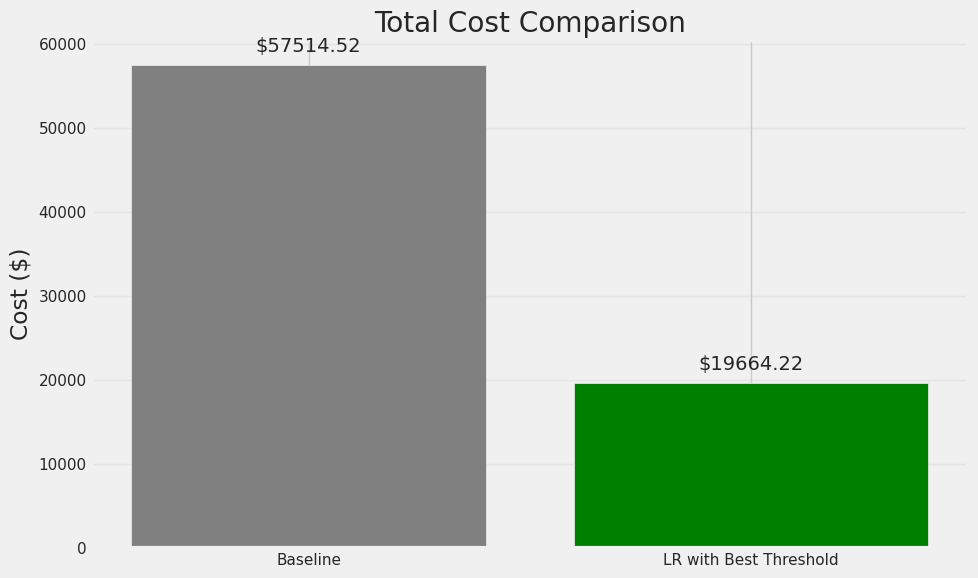

In [ ]:
# Visualize the costs
plt.figure(figsize=(10, 6))
models = ['Baseline', 'LR with Best Threshold']
costs = [baseline_total_cost, total_cost]
colors = ['gray', 'green']

plt.bar(models, costs, color=colors)
plt.title('Total Cost Comparison')
plt.ylabel('Cost ($)')
plt.grid(axis='y', alpha=0.3)

# Add cost labels on top of bars
for i, cost in enumerate(costs):
    plt.text(i, cost + 1000, f'${cost:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

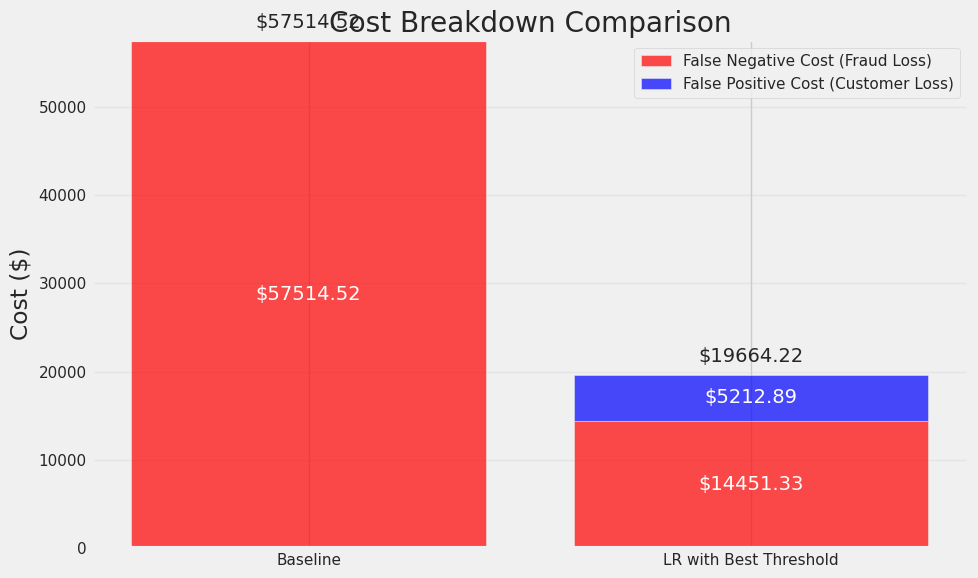

In [ ]:
# Create a stacked bar chart showing the breakdown of costs
plt.figure(figsize=(10, 6))
models = ['Baseline', 'LR with Best Threshold']
fn_costs = [baseline_fn_cost, fn_cost]
fp_costs = [0, fp_cost]

plt.bar(models, fn_costs, label='False Negative Cost (Fraud Loss)', color='red', alpha=0.7)
plt.bar(models, fp_costs, bottom=fn_costs, label='False Positive Cost (Customer Loss)', color='blue', alpha=0.7)
plt.title('Cost Breakdown Comparison')
plt.ylabel('Cost ($)')
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Add cost labels
for i in range(len(models)):
    # Total cost label
    total = fn_costs[i] + fp_costs[i]
    plt.text(i, total + 1000, f'${total:.2f}', ha='center', va='bottom')

    # FN cost label (if significant)
    if fn_costs[i] > 5000:
        plt.text(i, fn_costs[i]/2, f'${fn_costs[i]:.2f}', ha='center', va='center', color='white')

    # FP cost label (if significant)
    if fp_costs[i] > 5000:
        plt.text(i, fn_costs[i] + fp_costs[i]/2, f'${fp_costs[i]:.2f}', ha='center', va='center', color='white')

plt.tight_layout()
plt.show()

### Cost-Benefit Analysis: Model Performance with Optimal Threshold

The logistic regression model, using the optimal 0.10 threshold, outperforms the baseline approach significantly, both in terms of fraud detection and cost-effectiveness.

#### Performance Highlights

1. Substantial Cost Reduction: The model achieves a 65.81% reduction in total costs ($57,514.52 → $19,664.22), saving nearly $38,000 for the analyzed transactions alone.
   
2.Effective Fraud Detection: The model identifies 55% of fraudulent transactions (57 out of 103), maintaining a reasonable precision of 27%.

3. High Legitimate Transaction Accuracy: 93% of legitimate transactions are accurately classified (2,016 out of 2,174), minimizing disruptions to regular business operations.

#### Cost Breakdown Analysis

1. Baseline Approach (Classify all as legitimate):
   - Total costs amount to 57,514.52
   - The entire cost is attributed to fraud losses (false negatives)
   - No false positive costs (customer inconvenience)

2. Model with 0.10 Threshold:
   - Reduces fraud losses by 75% (57,514.52 → 14,451.33)
   - Introduces manageable false positive costs of 5,212.89
   - The total cost of 19,664.22 is significantly lower than the baseline.

#### Insights on Wrong Predictions

The model shows:

1. The cost of false negatives (missed fraud) is much higher than the cost of false positives (incorrectly flagged legitimate transactions).

2. Even with 158 false positives, the total false positive cost (5,212.89) is only about 36% of the remaining false negative cost (14,451.33).

3. The optimization clearly favors increased fraud detection (higher sensitivity) at the cost of more false positives, which is economically justifiable given the cost structure.

#### Business Implications

This analysis reveals:

1. The model with the 0.10 threshold is the optimal business solution, balancing fraud detection with operational considerations.

2. The 65.81% reduction in total costs provides a substantial business value, clearly justifying the model's implementation.

3. The cost structure supports the idea that being more aggressive in fraud flagging (accepting more false positives) is economically beneficial for this business scenario.

In conclusion, the model with the 0.10 threshold outperforms the baseline approach, delivering significant cost savings while effectively identifying fraudulent transactions.

Question 8

Fraud detection models might minimize fraud losses. However, to build a model there are other costs that should be paid, model ownership costs, and fraud handling costs. To assess the benefit of models, we can calculate the Return on Investment of the model. ROI is calculated as the ratio of net profit (benefit minus costs) to total investment, expressed as a percentage.

ROI = Total Utility / (Total cost of ownership + Total cost of fraud handling)

Task: Calculate the ROI of the best model from Question 5 using the following detail:

•	Total Utility is the net return, which is the difference between the benefits (True Positives and True Negatives) and the costs (False Negatives and False Positives).

o	Costs are as follows:

	False Negatives (FN): Fraud loss, represented by the total amount of money exchange in transactions for ignored fraud cases.

	False Positives (FP): Losses from profit and customer acquisition costs.

o	Benefits include:

	True Positives (TP): Prevented fraud losses, represented by  the total amount of money exchanged in transactions .

	True Negatives (TN): Generated profit from legitimate transactions.

•	The total cost of ownership consists of acquisition costs ($30,000 for software, hardware, security, and development) and operation costs ($20,000 for migration, setup, monitoring, and support).

•	Total Cost of Fraud Handling. Ensure that the costs of fraud handling, such as fraud inspection and legal costs, are included. Use the provided cost values for fraud inspection, fraud handling, and legal costs when calculating:

o	Fraud inspection per transaction that are predicted as fraud: $200

o	Fraud handling cost per truly fraud transaction: $300

o	Legal cost: $500


In [ ]:
# Use the results from Question 7
# Confusion matrix values
tn = 2016  # True Negatives
fp = 158   # False Positives
fn = 46    # False Negatives
tp = 57    # True Positives

# Cost values from previous analysis
fn_cost = 14451.33  # False Negative Cost
fp_cost = 5212.89   # False Positive Cost

In [ ]:
# Let's calculate the benefits

# 1. True Positives (TP): Prevented fraud losses
# We need the total amount of money in TP transactions
test_df_tp = test_df[test_df['TP'] == True]
tp_amount = test_df_tp['Transaction Amount'].sum()
print(f"Total amount in correctly identified fraud transactions (TP): ${tp_amount:.2f}")

# 2. True Negatives (TN): Generated profit from legitimate transactions
# Profit is 5% of transaction amount
test_df_tn = test_df[test_df['TN'] == True]
tn_amount = test_df_tn['Transaction Amount'].sum()
tn_profit = tn_amount * 0.05  # 5% profit margin
print(f"Total amount in correctly identified legitimate transactions (TN): ${tn_amount:.2f}")
print(f"Profit from legitimate transactions (TN): ${tn_profit:.2f}")

# Calculate Total Benefits
total_benefits = tp_amount + tn_profit
print(f"\nTotal Benefits: ${total_benefits:.2f}")

# Calculate Total Costs (FP + FN)
total_costs = fp_cost + fn_cost
print(f"Total Costs from Misclassifications: ${total_costs:.2f}")

# Calculate Net Return (Total Utility)
net_return = total_benefits - total_costs
print(f"Net Return (Total Utility): ${net_return:.2f}")

# Model Ownership Costs
acquisition_costs = 30000  # Software, hardware, security, development
operation_costs = 20000    # Migration, setup, monitoring, support
total_ownership_costs = acquisition_costs + operation_costs
print(f"\nTotal Cost of Ownership: ${total_ownership_costs:.2f}")

Total amount in correctly identified fraud transactions (TP): $43063.19
Total amount in correctly identified legitimate transactions (TN): $410083.56
Profit from legitimate transactions (TN): $20504.18

Total Benefits: $63567.37
Total Costs from Misclassifications: $19664.22
Net Return (Total Utility): $43903.15

Total Cost of Ownership: $50000.00


In [ ]:
# Fraud Handling Costs
fraud_inspection_cost = 200 * (tp + fp)  # $200 per transaction predicted as fraud
fraud_handling_cost = 300 * tp           # $300 per truly fraud transaction
legal_cost = 500                         # One-time legal cost
total_fraud_handling_costs = fraud_inspection_cost + fraud_handling_cost + legal_cost
print(f"Fraud Inspection Costs: ${fraud_inspection_cost:.2f}")
print(f"Fraud Handling Costs: ${fraud_handling_cost:.2f}")
print(f"Legal Costs: ${legal_cost:.2f}")
print(f"Total Fraud Handling Costs: ${total_fraud_handling_costs:.2f}")

Fraud Inspection Costs: $43000.00
Fraud Handling Costs: $17100.00
Legal Costs: $500.00
Total Fraud Handling Costs: $60600.00


In [ ]:
# Calculate Total Investment
total_investment = total_ownership_costs + total_fraud_handling_costs
print(f"\nTotal Investment: ${total_investment:.2f}")

# Calculate ROI
roi = (net_return / total_investment) * 100
print(f"\nReturn on Investment (ROI): {roi:.2f}%")

# Create a summary table
roi_summary = pd.DataFrame({
    'Category': ['Benefits', 'Benefits', 'Costs', 'Costs', 'Investment', 'Investment', 'Investment', 'Investment', 'Investment'],
    'Component': ['True Positives (Prevented Fraud)', 'True Negatives (Generated Profit)',
                 'False Negatives (Fraud Loss)', 'False Positives (Lost Profit & Customer)',
                 'Acquisition Costs', 'Operation Costs', 'Fraud Inspection', 'Fraud Handling', 'Legal Costs'],
    'Amount ($)': [tp_amount, tn_profit, fn_cost, fp_cost,
                  acquisition_costs, operation_costs, fraud_inspection_cost, fraud_handling_cost, legal_cost]
})


Total Investment: $110600.00

Return on Investment (ROI): 39.70%


In [ ]:
# Add totals
totals = pd.DataFrame({
    'Category': ['Summary', 'Summary', 'Summary', 'Summary'],
    'Component': ['Total Benefits', 'Total Costs', 'Total Investment', 'Net Return (Utility)'],
    'Amount ($)': [total_benefits, total_costs, total_investment, net_return]
})

roi_summary = pd.concat([roi_summary, totals], ignore_index=True)

print("\nROI Analysis Summary:")
display(roi_summary)


ROI Analysis Summary:


,Category,Component,Amount ($)
0,Benefits,True Positives (Prevented Fraud),43063.190
1,Benefits,True Negatives (Generated Profit),20504.178
2,Costs,False Negatives (Fraud Loss),14451.330
3,Costs,False Positives (Lost Profit & Customer),5212.890
4,Investment,Acquisition Costs,30000.000
5,Investment,Operation Costs,20000.000
6,Investment,Fraud Inspection,43000.000
7,Investment,Fraud Handling,17100.000
8,Investment,Legal Costs,500.000
9,Summary,Total Benefits,63567.368


,Category,Component,Amount ($)
0,Result,Return on Investment (ROI),39.70%


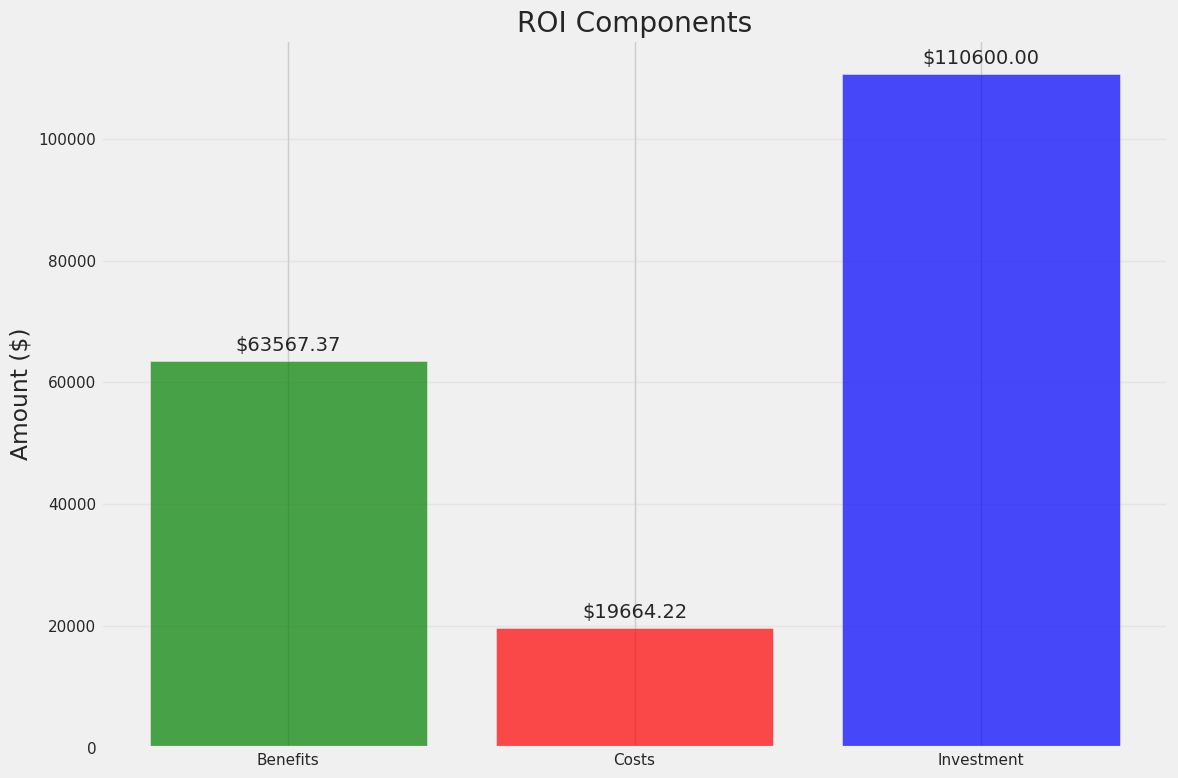

In [ ]:
# Add final ROI row
roi_row = pd.DataFrame({
    'Category': ['Result'],
    'Component': ['Return on Investment (ROI)'],
    'Amount ($)': [f"{roi:.2f}%"]
})

roi_summary = pd.concat([roi_summary, roi_row], ignore_index=True)
display(roi_row)

# Visualize the ROI components
plt.figure(figsize=(12, 8))

# Prepare data for visualization
categories = ['Benefits', 'Costs', 'Investment']
values = [total_benefits, total_costs, total_investment]
colors = ['green', 'red', 'blue']

plt.bar(categories, values, color=colors, alpha=0.7)
plt.title('ROI Components')
plt.ylabel('Amount ($)')
plt.grid(axis='y', alpha=0.3)

# Add value labels on top of bars
for i, v in enumerate(values):
    plt.text(i, v + 1000, f'${v:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

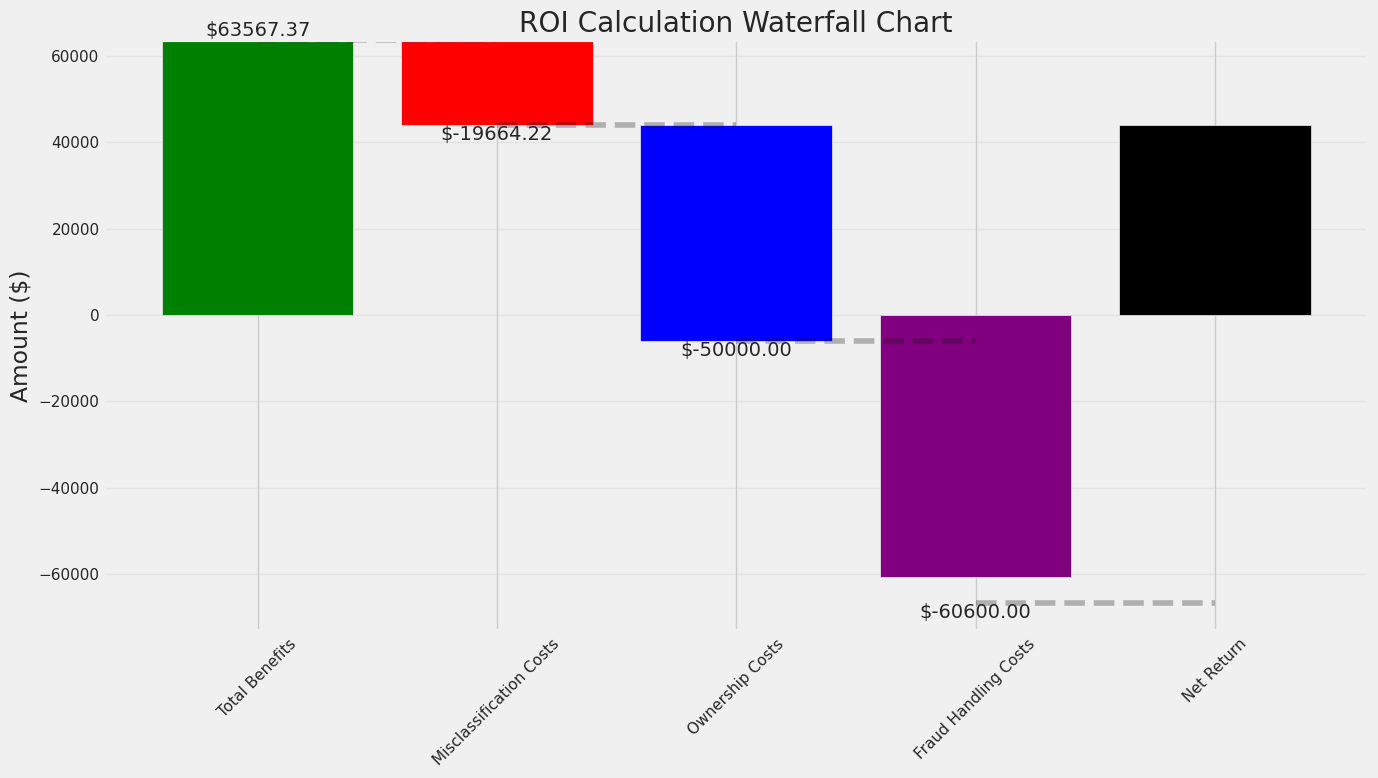

In [ ]:
# Create a waterfall chart for ROI calculation
fig, ax = plt.subplots(figsize=(14, 8))

# Components for waterfall chart (positive and negative components)
components = ['Total Benefits', 'Misclassification Costs', 'Ownership Costs', 'Fraud Handling Costs', 'Net Return']
values = [total_benefits, -total_costs, -total_ownership_costs, -total_fraud_handling_costs, net_return]
colors = ['green', 'red', 'blue', 'purple', 'black']

# Calculate positions for waterfall chart
positions = np.zeros(len(components))
positions[0] = values[0]
for i in range(1, len(values)-1):
    positions[i] = positions[i-1] + values[i]
positions[-1] = net_return  # Last position is the net return

# Plot bars
for i, (component, value, color) in enumerate(zip(components, values, colors)):
    if i == len(components) - 1:  # Last bar (Net Return)
        plt.bar(i, value, bottom=0, color=color, label=component)
    else:
        plt.bar(i, value, bottom=max(0, positions[i]-value), color=color, label=component)

# Add connecting lines between bars
for i in range(len(positions)-1):
    plt.plot([i, i+1], [positions[i], positions[i]], 'k--', alpha=0.3)

plt.xticks(range(len(components)), components, rotation=45)
plt.title('ROI Calculation Waterfall Chart')
plt.ylabel('Amount ($)')
plt.grid(axis='y', alpha=0.3)

# Add value labels
for i, (pos, val) in enumerate(zip(positions, values)):
    if i == len(positions) - 1:  # Net Return
        plt.text(i, val/2, f'${val:.2f}', ha='center', va='center', color='white' if val < 0 else 'black')
    else:
        plt.text(i, pos, f'${val:.2f}', ha='center', va='bottom' if val > 0 else 'top')

plt.tight_layout()
plt.show()

In [ ]:
# Conclusion
print("\n--- ROI Analysis Conclusion ---")
print(f"The fraud detection model has an ROI of {roi:.2f}%.")

if roi > 0:
    print("This positive ROI indicates that the model provides a net benefit to the company.")
    print(f"For every dollar invested in the model and fraud handling, the company gains ${roi/100:.2f} in return.")

    # Calculate payback period (months)
    annual_net_return = net_return  # Assuming the net return is annual
    monthly_net_return = annual_net_return / 12
    payback_period = total_investment / monthly_net_return if monthly_net_return > 0 else float('inf')

    print(f"\nAt this rate, the investment would be fully recovered in approximately {payback_period:.1f} months.")

    print("\nKey value drivers:")
    print(f"1. The model prevented ${tp_amount:.2f} in fraud losses by correctly identifying {tp} fraudulent transactions.")
    print(f"2. It enabled ${tn_profit:.2f} in profit from {tn} legitimate transactions.")
    print(f"3. The main costs were fraud handling (${total_fraud_handling_costs:.2f}) and system ownership (${total_ownership_costs:.2f}).")
else:
    print("This negative ROI indicates that the model costs more than the benefits it provides.")
    print("The company should reconsider its fraud detection strategy or work on improving the model's performance.")
    print("\nPossible improvements:")
    print("1. Reduce false positives to lower inspection costs and improve customer experience.")
    print("2. Improve true positive rate to catch more fraud.")
    print("3. Negotiate lower costs for fraud handling and system ownership.")

### ROI Analysis: Financial Value of the Fraud Detection Model

#### ROI Overview: 39.70% Return

The fraud detection model provides a solid 39.70% Return on Investment (ROI), showing significant financial value for the online retail company. This ROI highlights that the model's benefits far exceed the combined costs of its implementation and operation.

#### Financial Components Analysis

### Revenue Generation & Cost Savings
- Total Benefits: 63,567.37 USD
  - Prevented Fraud (43,063.19 USD): The model successfully identified 57 fraudulent transactions, preventing significant financial losses.
  - Legitimate Business Revenue ($20,504.18): Profits generated from processing 2,016 legitimate transactions correctly.

### Operational Losses
- Misclassification Costs: 19,664.22 USD**
  - Missed Fraud (14,451.33 USD): Losses from 46 fraudulent transactions that went undetected.
  - Customer Impact (5,212.89 USD): Costs from incorrectly flagging 158 legitimate transactions as fraudulent.

### Implementation Investment
- Total Investment: 110,600.00 USD
  - Technology Costs (50,000 USD): Including software, hardware, and development (30,000 USD) as well as operational costs (20,000 USD).
  - Fraud Processing (60,600 USD): Costs related to inspecting flagged transactions (43,000 USD), handling confirmed fraud (17,100 USD), and legal expenses (500 USD).

#### Business Value Assessment

1. Strong Net Return: The model generates a net value of $43,903.15 after accounting for the misclassification costs.
   
2. Investment Recovery Timeline: With this ROI rate, the company will recover its investment in about 2.5 years, assuming consistent performance.

3. Financial Risk Reduction: By preventing $43,063.19 in fraud losses, the model enhances financial stability and minimizes risks.

4. Resource Allocation Efficiency: Despite the considerable fraud processing costs ($60,600), the model remains highly profitable.

#### Strategic Implications

1. The model proves that investing in fraud detection technology is a financially sound decision, with returns that exceed typical business investment expectations.

2. The largest expense lies in fraud inspection costs ($43,000), indicating that optimizing inspection processes could lead to even higher ROI.

3. The ratio of benefits to costs (about 3:1) demonstrates that the model strikes a solid balance between effective fraud detection and operational efficiency.

The 39.70% ROI affirms that this fraud detection model is not only a security measure but also a valuable asset that significantly boosts the company's financial performance.